In [5]:
import pandas as pd
import polars as pl

df = pd.read_csv('/home/toefl/K/MCTS/dataset/train.csv')

In [6]:
print(list(df["utility_agent1"].unique()))

[-0.4666666666666667, -0.3333333333333333, -0.0666666666666666, 0.0666666666666666, 0.2, -0.2, -0.7333333333333333, 0.6, 0.4666666666666667, 0.3333333333333333, -0.6, 0.4, 0.1333333333333333, 0.2666666666666666, 0.5333333333333333, 0.7333333333333333, 1.0, 0.8, 0.9333333333333332, 0.8666666666666667, -0.1333333333333333, -1.0, 0.6666666666666666, -0.2666666666666666, -0.5333333333333333, 0.0, -0.4, 0.3666666666666666, -0.8666666666666667, -0.9333333333333332, -0.6666666666666666, -0.8, 0.2888888888888888, 0.0333333333333333, -0.9666666666666668, 0.5666666666666667, 0.9, -0.8333333333333334, -0.4333333333333333, -0.1666666666666666, 0.1, 0.3, -0.5, -0.5666666666666667, 0.7666666666666667, -0.7, 0.2333333333333333, -0.7666666666666667, 0.1666666666666666, -0.1, -0.2333333333333333, 0.9666666666666668, 0.8333333333333334, -0.6333333333333333, -0.0333333333333333, 0.9555555555555556, -0.9555555555555556, -0.3666666666666666, -0.3, 0.5, 0.7, 0.6333333333333333, 0.4333333333333333, -0.9, 0.0

In [18]:
df["MovesPerSecond"].head()

0    18877.17
1    18877.17
2    18877.17
3    18877.17
4    18877.17
Name: MovesPerSecond, dtype: float64

In [6]:
df[["GameRulesetName", "agent1", "agent2", "AdvantageP1"]].head(1000)

,GameRulesetName,agent1,agent2,AdvantageP1
0,00Y,MCTS-ProgressiveHistory-0.1-MAST-false,MCTS-ProgressiveHistory-0.6-Random200-false,0.50
1,00Y,MCTS-ProgressiveHistory-0.1-MAST-false,MCTS-UCB1GRAVE-0.6-NST-true,0.50
2,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1-0.1-NST-false,0.50
3,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1-0.6-NST-false,0.50
4,00Y,MCTS-ProgressiveHistory-0.1-MAST-true,MCTS-UCB1GRAVE-1.41421356237-NST-false,0.50
...,...,...,...,...
995,58_HolesCarter_Crossover_1_D4_Suggested,MCTS-UCB1-1.41421356237-Random200-false,MCTS-ProgressiveHistory-0.6-NST-false,0.44
996,58_HolesCarter_Crossover_1_D4_Suggested,MCTS-UCB1-1.41421356237-Random200-false,MCTS-UCB1Tuned-0.6-NST-false,0.44
997,58_HolesCarter_Crossover_1_D4_Suggested,MCTS-UCB1GRAVE-0.1-MAST-false,MCTS-UCB1-0.1-NST-false,0.44
998,58_HolesCarter_Crossover_1_D4_Suggested,MCTS-UCB1GRAVE-0.1-MAST-false,MCTS-UCB1GRAVE-0.6-NST-false,0.44


In [7]:
different_columns = df.columns[df.iloc[0] != df.iloc[1]].tolist()

print(different_columns)

['Id', 'agent2', 'Behaviour', 'StateRepetition', 'Duration', 'Complexity', 'BoardCoverage', 'GameOutcome', 'StateEvaluation', 'Clarity', 'Decisiveness', 'Drama', 'MoveEvaluation', 'StateEvaluationDifference', 'BoardSitesOccupied', 'BranchingFactor', 'DecisionFactor', 'MoveDistance', 'PieceNumber', 'ScoreDifference', 'num_wins_agent1', 'num_losses_agent1', 'utility_agent1']


In [12]:
a = ['Behaviour', 'StateRepetition', 'Duration', 'Complexity', 'BoardCoverage', 'GameOutcome', 'StateEvaluation', 'Clarity', 'Decisiveness', 'Drama', 'MoveEvaluation', 'StateEvaluationDifference', 'BoardSitesOccupied', 'BranchingFactor', 'DecisionFactor', 'MoveDistance', 'PieceNumber', 'ScoreDifference']

In [13]:
b = ['PieceState', 'GraphStyle', 'MovesOperators', 'SowCCW', 'ScoreDifferenceMedian', 'AbsoluteDirections', 'PushEffectFrequency', 'LineWin', 'LeapDecisionToEmptyFrequency', 'AlquerqueBoardWithOneTriangle', 'TaflStyle', 'Capture', 'Even', 'RegularShape', 'SlideDecisionToFriendFrequency', 'SwapPiecesDecisionFrequency', 'AddDecision', 'LineLossFrequency', 'CheckmateFrequency', 'Multiplication', 'MoveAgain', 'TriangleTiling', 'SetSiteState', 'SwapPlayersDecision', 'RemoveDecision', 'LineOfSight', 'CaptureEnd', 'SquareTiling', 'ForwardsDirection', 'NoProgressEndFrequency', 'Draw', 'Odd', 'Parity', 'ConnectionLossFrequency', 'NoMovesWin', 'SurakartaStyle', 'Checkmate', 'TrackLoop', 'StepEffect', 'StepDecisionToFriend', 'Maximum', 'HopEffect', 'NineMensMorrisBoard', 'TriangleShape', 'FillWinFrequency', 'Style', 'FlipFrequency', 'VoteEffect', 'NoMoves', 'Meta', 'GroupEndFrequency', 'Hand', 'NoMovesEnd', 'CountPiecesMoverComparison', 'FromToDecision', 'StackType', 'IsEnemy', 'AlquerqueBoardWithFourTriangles', 'MancalaFourRows', 'Group', 'HopDecisionFriendToEnemyFrequency', 'NoOwnPiecesWinFrequency', 'CountPiecesComparison', 'VoteDecision', 'NoProgressDrawFrequency', 'RaceEnd', 'SetRotation', 'CrossBoard', 'SwapPlayersEffect', 'PieceRotation', 'ReplacementCapture', 'TerritoryWinFrequency', 'HopDecisionFriendToFriendFrequency', 'NoPieceMover', 'LineEnd', 'LeapDecision', 'PolygonShape', 'SemiRegularTiling', 'EliminatePiecesLossFrequency', 'NumDice', 'FromToDecisionFrequency', 'RemoveEffect', 'FillEndFrequency', 'CanMove', 'StarBoard', 'Track', 'PassEffect', 'ProposeDecisionFrequency', 'ConnectionEnd', 'Modulo', 'ChessComponent', 'NoProgressDraw', 'FromToDecisionEmpty', 'Scoring', 'LineLoss', 'PatternEnd', 'NoTargetPieceWinFrequency', 'NoOwnPiecesEnd', 'PatternEndFrequency', 'Efficiency', 'PenAndPaperStyle', 'ForgetValues', 'MancalaTwoRows', 'DiagonalDirection', 'HopDecision', 'PatternWinFrequency', 'StackState', 'Stack', 'StateType', 'ShowPieceState', 'AlquerqueBoardWithTwoTriangles', 'Math', 'TaflComponent', 'HopDecisionFriendToEmptyFrequency', 'InitialScore', 'PatternWin', 'SquarePyramidalShape', 'Directions', 'Pattern', 'SetMove', 'Division', 'PromotionEffect', 'ScoringLossFrequency', 'ShibumiStyle', 'ScoringWin', 'TrackOwned', 'ShowPieceValue', 'DiamondShape', 'GroupWinFrequency', 'LeapDecisionToEnemy', 'BackwardDirection', 'ScoringLoss', 'AddEffect', 'BackgammonStyle', 'ReachWin', 'Absolute', 'PieceValue', 'ScoringEnd', 'NoTargetPiece', 'HopDecisionFriendToEnemy', 'ScoringDraw', 'NoMovesLoss', 'ConnectionLoss', 'HopDecisionEnemyToEnemyFrequency', 'QueenComponent', 'PawnComponent', 'ShootDecision', 'Implementation', 'GroupEnd', 'NoMovesDrawFrequency', 'RememberValues', 'CircleTiling', 'ThreeMensMorrisBoard', 'FairyChessComponent', 'SetInternalCounter', 'BackwardLeftDirection', 'OppositeDirection', 'PromotionDecision', 'LeapEffect', 'Territory', 'Moves', 'FromToEffect', 'SlideEffect', 'SetCountFrequency', 'BishopComponent', 'CircleShape', 'ReachLoss', 'ProposeDecision', 'PloyComponent', 'XiangqiStyle', 'CheckmateWin', 'DiceD6', 'AggressiveActionsRatio', 'FromToDecisionFriend', 'ProgressCheck', 'ForwardDirection', 'LargePiece', 'HopCaptureMoreThanOne', 'DiceD4', 'LeftwardDirection', 'NoProgressEnd', 'InternalCounter', 'ByDieMove', 'FromToDecisionEnemy', 'CanNotMove', 'Minimum', 'Dice', 'Stochastic', 'HexTiling', 'SameDirection', 'PushEffect', 'ForwardLeftDirection', 'EliminatePiecesLoss', 'DirectionCapture', 'SowCapture', 'StepDecisionToEnemy', 'BackwardRightDirection', 'SlideDecision', 'InitialCost', 'LeapDecisionToEmpty', 'AlquerqueBoardWithEightTriangles', 'GroupWin', 'Tile', 'TerritoryEnd', 'DirectionCaptureFrequency', 'NoBoard', 'NoTargetPieceWin', 'ForwardRightDirection', 'ProposeEffectFrequency', 'TurnKo', 'NoOwnPiecesLossFrequency', 'RotationalDirection', 'SowRemove', 'HopDecisionEnemyToEnemy', 'RookComponent', 'TableStyle', 'TerritoryWin', 'MancalaSixRows', 'MaxDistance', 'NoOwnPiecesLoss', 'Threat', 'PositionalSuperko', 'CaptureSequence', 'NumOffDiagonalDirections', 'ProposeEffect', 'Roll', 'SlideDecisionToFriend', 'LineDraw', 'SetValue', 'GroupDraw', 'SumDice', 'ThreeMensMorrisBoardWithTwoTriangles', 'KingComponent', 'Repetition', 'SurroundCapture', 'Loop', 'NoOwnPiecesWin', 'BranchingFactorChangeNumTimesn', 'RotationDecision', 'LoopEndFrequency', 'InterveneCapture', 'HopDecisionFriendToEmpty', 'EliminatePiecesDrawFrequency', 'DiceD2', 'Edge', 'SetCount', 'RightwardDirection', 'LoopEnd', 'ShogiStyle', 'SwapPiecesDecision', 'FortyStonesWithFourGapsBoard', 'StarShape', 'Boardless', 'MancalaCircular', 'XiangqiComponent', 'ReachLossFrequency', 'Fill', 'SlideDecisionToEnemy', 'JanggiComponent', 'KintsBoard', 'ShogiComponent', 'SowBacktracking', 'Piece', 'InitialRandomPlacement', 'LoopWin', 'LoopWinFrequency', 'Flip', 'FillEnd', 'JanggiStyle', 'ShootDecisionFrequency', 'MancalaThreeRows', 'StrategoComponent', 'RotationDecisionFrequency', 'InterveneCaptureFrequency', 'EliminatePiecesDraw', 'AutoMove', 'PachisiBoard', 'GroupLoss', 'PathExtent', 'VisitedSites', 'Cooperation', 'SetRotationFrequency', 'FillWin', 'SpiralTiling', 'PathExtentEnd', 'SpiralShape', 'Team', 'ReachDrawFrequency', 'LeftwardsDirection', 'ReachDraw', 'PathExtentLoss', 'PathExtentWin', 'LoopLoss', 'RightwardsDirection']

In [14]:
set(a) & set(b)

set()

In [ ]:
['Behaviour', 'StateRepetition', 'Duration', 'Complexity', 'BoardCoverage', 'GameOutcome', 'StateEvaluation', 'Clarity', 'Decisiveness', 'Drama', 'MoveEvaluation', 'StateEvaluationDifference', 'BoardSitesOccupied', 'BranchingFactor', 'DecisionFactor', 'MoveDistance', 'PieceNumber', 'ScoreDifference']

In [28]:
df["DurationTurnsNotTimeouts"].value_counts()

0.00      7716
61.00      722
67.41      402
19.24      382
35.02      380
          ... 
106.85      72
71.65       72
436.46      72
136.65      70
13.86        4
Name: DurationTurnsNotTimeouts, Length: 1295, dtype: int64

In [10]:
df["num_games"] = df["num_wins_agent1"] + df["num_losses_agent1"] + df["num_draws_agent1"]
df = df.with_columns(
    (pl.col("num_wins_agent1") + pl.col("num_losses_agent1") + pl.col("num_draws_agent1")).alias("num_games")
)

In [11]:
df["num_games"].value_counts()

15    230434
30      2788
45        12
Name: num_games, dtype: int64

In [3]:
df["utility_agent1"].nunique()

68

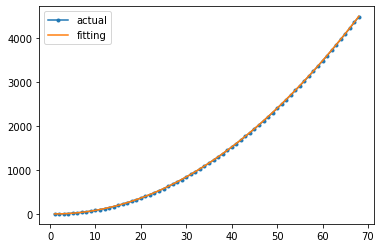

In [8]:
# You should define a and b values that fits your quadratic QWK spline.
# You can also write an Optuna routine for this.

import numpy as np
import matplotlib.pyplot as plt

y = df["utility_agent1"].values

a = 1
b = 1

g = np.zeros(68)
for i in range(68):
    g[i] = ((y - i)**2).mean()
plt.plot([*range(1, 69)], g, marker=".", label="actual")
plt.plot([*range(1, 69)], [(x-a)**2 + b for x in [*range(1, 69)]], label="fitting")
plt.legend()
plt.show()

In [36]:
from tqdm import tqdm

df = df.drop(['Id','num_wins_agent1','num_draws_agent1', 'num_losses_agent1', 'GameRulesetName', 'EnglishRules', "LudRules"], axis=1)

mappings = {}
for feature in tqdm(df.columns):
    if feature == "utility_agent1": continue
    m = {}

    for u in df[feature].unique():
        slc = df[df[feature] == u]
        if len(slc) < 100: continue

        if (slc["utility_agent1"] == 1).all():
            m[feature] = 3
        elif (slc["utility_agent1"] == 0).all():
            m[feature] = 2
        elif (slc["utility_agent1"] == -1).all():
            m[feature] = 1
        else:
            m[feature] = 0
    
    mappings[feature] = m

100%|██████████| 807/807 [03:57<00:00,  3.39it/s]


In [ ]:
from tqdm import tqdm

df = df.drop(['Id','num_wins_agent1','num_draws_agent1', 'num_losses_agent1', 'GameRulesetName', 'EnglishRules', "LudRules"], axis=1)

columns = []
for feature in tqdm(df.columns):
    for u in df[feature].unique():
        slc = df[df[feature] == u]
        if slc["utility_agent1"].mean() < -0.99:
            columns.append((feature, u, len(slc), "target=-1"))
        elif slc["utility_agent1"].mean() > 0.99:
            columns.append((feature, u, len(slc), "target=1"))
        elif (slc["utility_agent1"] == 0).all():
            columns.append((feature, u, len(slc), "target=0"))

print(columns)

In [20]:
columns = sorted(columns, key=lambda x: x[2], reverse=True)

In [26]:
len(columns)

2007

In [16]:
df["DurationActions"].value_counts()

2500.00     724
487.02      392
12.00       374
27.64       374
923.46      372
           ... 
41032.38     72
1609.31      72
620.98       72
2279.93      70
359.20        4
Name: DurationActions, Length: 1361, dtype: int64

In [22]:
len(['autoFE_f_112', 'autoFE_f_468', 'autoFE_f_386', 'autoFE_f_6', 'autoFE_f_333', 'autoFE_f_357', 'autoFE_f_353', 'autoFE_f_194', 'autoFE_f_59', 'autoFE_f_174', 'autoFE_f_191', 'autoFE_f_182', 'autoFE_f_436', 'autoFE_f_261', 'autoFE_f_328', 'autoFE_f_189', 'autoFE_f_8', 'autoFE_f_275', 'autoFE_f_279', 'autoFE_f_223', 'autoFE_f_154', 'autoFE_f_319', 'autoFE_f_221', 'autoFE_f_218', 'autoFE_f_380', 'autoFE_f_402', 'autoFE_f_276', 'autoFE_f_1', 'autoFE_f_253', 'autoFE_f_362', 'autoFE_f_294', 'autoFE_f_108', 'autoFE_f_484', 'autoFE_f_11', 'autoFE_f_200', 'autoFE_f_356', 'autoFE_f_491', 'autoFE_f_2', 'autoFE_f_248', 'autoFE_f_176', 'autoFE_f_449', 'autoFE_f_335', 'autoFE_f_310', 'autoFE_f_479', 'autoFE_f_322', 'autoFE_f_446', 'autoFE_f_198', 'autoFE_f_116', 'autoFE_f_206', 'autoFE_f_214', 'autoFE_f_228', 'autoFE_f_361', 'autoFE_f_460', 'autoFE_f_354', 'autoFE_f_257', 'autoFE_f_78', 'autoFE_f_482', 'autoFE_f_466', 'autoFE_f_287', 'autoFE_f_67', 'autoFE_f_462', 'autoFE_f_481', 'autoFE_f_419', 'autoFE_f_0', 'autoFE_f_7', 'autoFE_f_392', 'autoFE_f_62', 'autoFE_f_135', 'autoFE_f_5', 'autoFE_f_184', 'autoFE_f_246', 'autoFE_f_474', 'autoFE_f_157', 'autoFE_f_304', 'autoFE_f_377', 'autoFE_f_384', 'autoFE_f_187', 'autoFE_f_340', 'autoFE_f_51', 'autoFE_f_281', 'autoFE_f_109', 'autoFE_f_50', 'autoFE_f_141', 'autoFE_f_183', 'autoFE_f_478', 'autoFE_f_54', 'autoFE_f_119', 'autoFE_f_159', 'autoFE_f_265', 'autoFE_f_258', 'autoFE_f_313', 'autoFE_f_101', 'autoFE_f_262', 'autoFE_f_366', 'autoFE_f_330', 'autoFE_f_15', 'autoFE_f_126', 'autoFE_f_404', 'autoFE_f_169', 'autoFE_f_270'])

100

In [21]:
columns

[('utility_agent1', 1.0, 29604, 'target=1'),
 ('utility_agent1', -1.0, 23846, 'target=-1'),
 ('utility_agent1', 0.0, 19711, 'target=0'),
 ('DurationActions', 2500.0, 724, 'target=0'),
 ('DurationMoves', 10000.0, 528, 'target=0'),
 ('BranchingFactorAverage', 5.08, 392, 'target=1'),
 ('PieceNumberMaximum', 3.99, 390, 'target=1'),
 ('DecisionFactorMedian', 6.13, 384, 'target=-1'),
 ('BranchingFactorChangeMaxDecrease', -7.22, 372, 'target=1'),
 ('DecisionFactorVariance', 5.67, 370, 'target=1'),
 ('DecisionFactorMaxIncrease', 8.17, 370, 'target=-1'),
 ('PieceNumberAverage', 3.75, 370, 'target=-1'),
 ('FromToDecisionWithinBoardFrequency', 0.04, 366, 'target=0'),
 ('BranchingFactorChangeMaxDecrease', -9.15, 364, 'target=1'),
 ('DecisionFactorMedian', 5.12, 364, 'target=1'),
 ('SlideDecisionFrequency', 0.89, 362, 'target=0'),
 ('CustodialCaptureFrequency', 0.08, 362, 'target=0'),
 ('DecisionFactorAverage', 3.74, 362, 'target=1'),
 ('PieceNumberAverage', 3.96, 362, 'target=1'),
 ('DecisionFacto

In [3]:
df["Asymmetric"].value_counts()

0    189742
1     43492
Name: Asymmetric, dtype: int64

In [ ]:
pl.Config = pl.Config(tbl_cols=-1)

In [ ]:
df["NumDice"].value_counts()

NumDice,count
i64,u32
4,5110
7,270
1,4062
5,84
6,780
0,217358
2,3608
3,1962


In [ ]:
df.head(10)

Id,GameRulesetName,agent1,agent2,Properties,Format,Time,Discrete,Realtime,Turns,Alternating,Simultaneous,Stochastic,HiddenInformation,Match,Asymmetric,AsymmetricRules,AsymmetricPlayRules,AsymmetricEndRules,AsymmetricForces,AsymmetricSetup,AsymmetricPiecesType,Players,NumPlayers,Simulation,Solitaire,TwoPlayer,Multiplayer,PlayersWithDirections,Cooperation,Team,Coalition,Puzzle,DeductionPuzzle,PlanningPuzzle,Equipment,Container,Board,Shape,SquareShape,HexShape,TriangleShape,DiamondShape,RectangleShape,SpiralShape,CircleShape,PrismShape,StarShape,ParallelogramShape,SquarePyramidalShape,RectanglePyramidalShape,RegularShape,PolygonShape,TargetShape,Tiling,SquareTiling,HexTiling,TriangleTiling,BrickTiling,SemiRegularTiling,CelticTiling,MorrisTiling,QuadHexTiling,CircleTiling,ConcentricTiling,SpiralTiling,AlquerqueTiling,MancalaBoard,MancalaStores,MancalaTwoRows,MancalaThreeRows,MancalaFourRows,MancalaSixRows,MancalaCircular,AlquerqueBoard,AlquerqueBoardWithOneTriangle,AlquerqueBoardWithTwoTriangles,AlquerqueBoardWithFourTriangles,AlquerqueBoardWithEightTriangles,ThreeMensMorrisBoard,ThreeMensMorrisBoardWithTwoTriangles,NineMensMorrisBoard,StarBoard,CrossBoard,KintsBoard,PachisiBoard,FortyStonesWithFourGapsBoard,Track,TrackLoop,TrackOwned,Hints,Region,Boardless,PlayableSites,Vertex,Cell,Edge,NumPlayableSitesOnBoard,NumColumns,NumRows,NumCorners,NumDirections,NumOrthogonalDirections,NumDiagonalDirections,NumAdjacentDirections,NumOffDiagonalDirections,NumOuterSites,NumInnerSites,NumLayers,NumEdges,NumCells,NumVertices,NumPerimeterSites,NumTopSites,NumBottomSites,NumRightSites,NumLeftSites,NumCentreSites,NumConvexCorners,NumConcaveCorners,NumPhasesBoard,Hand,NumContainers,NumPlayableSites,Component,Piece,PieceValue,PieceRotation,PieceDirection,Dice,DiceD2,DiceD3,DiceD4,DiceD6,BiasedDice,Card,Domino,LargePiece,Tile,NumComponentsType,NumComponentsTypePerPlayer,NumDice,Rules,Meta,OpeningContract,SwapOption,Repetition,TurnKo,SituationalTurnKo,PositionalSuperko,SituationalSuperko,AutoMove,Start,PiecesPlacedOnBoard,PiecesPlacedOutsideBoard,InitialRandomPlacement,InitialScore,InitialAmount,InitialPot,InitialCost,NumStartComponentsBoard,NumStartComponentsHand,NumStartComponents,NumStartComponentsBoardPerPlayer,NumStartComponentsHandPerPlayer,NumStartComponentsPerPlayer,Play,Moves,MovesDecision,NoSiteMoves,BetDecision,BetDecisionFrequency,VoteDecision,VoteDecisionFrequency,SwapPlayersDecision,SwapPlayersDecisionFrequency,ChooseTrumpSuitDecision,ChooseTrumpSuitDecisionFrequency,PassDecision,PassDecisionFrequency,ProposeDecision,ProposeDecisionFrequency,SingleSiteMoves,AddDecision,AddDecisionFrequency,PromotionDecision,PromotionDecisionFrequency,RemoveDecision,RemoveDecisionFrequency,RotationDecision,RotationDecisionFrequency,TwoSitesMoves,StepDecision,StepDecisionFrequency,StepDecisionToEmpty,StepDecisionToEmptyFrequency,StepDecisionToFriend,StepDecisionToFriendFrequency,StepDecisionToEnemy,StepDecisionToEnemyFrequency,SlideDecision,SlideDecisionFrequency,SlideDecisionToEmpty,SlideDecisionToEmptyFrequency,SlideDecisionToEnemy,SlideDecisionToEnemyFrequency,SlideDecisionToFriend,SlideDecisionToFriendFrequency,LeapDecision,LeapDecisionFrequency,LeapDecisionToEmpty,LeapDecisionToEmptyFrequency,LeapDecisionToFriend,LeapDecisionToFriendFrequency,LeapDecisionToEnemy,LeapDecisionToEnemyFrequency,HopDecision,HopDecisionFrequency,HopDecisionMoreThanOne,HopDecisionMoreThanOneFrequency,HopDecisionEnemyToEmpty,HopDecisionEnemyToEmptyFrequency,HopDecisionFriendToEmpty,HopDecisionFriendToEmptyFrequency,HopDecisionEnemyToFriend,HopDecisionEnemyToFriendFrequency,HopDecisionFriendToFriend,HopDecisionFriendToFriendFrequency,HopDecisionEnemyToEnemy,HopDecisionEnemyToEnemyFrequency,HopDecisionFriendToEnemy,HopDecisionFriendToEnemyFrequency,FromToDecision,FromToDecisionFrequency,FromToDecisionWithinBoard,FromToDecisionWithinBoardFrequency,FromToDecisionBetweenContainers,FromToDecisionBetweenContainersFrequency,FromToDecisionEmpty,FromToDecisionEmptyFrequency,FromToDeci

In [ ]:
df = df.drop(df.columns[df.nunique() <= 1], axis=1)

In [ ]:
df.shape

(233234, 598)

In [ ]:
corrs = df.corr()

In [ ]:
len()

44468

In [ ]:
df[(df["DrawFrequency"] == 1) & (df["utility_agent1"] == 0)]["utility_agent1"].mean()

9537

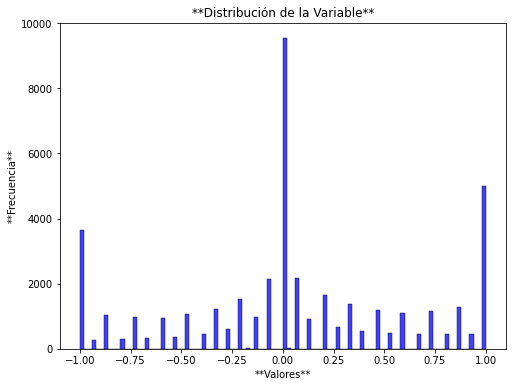

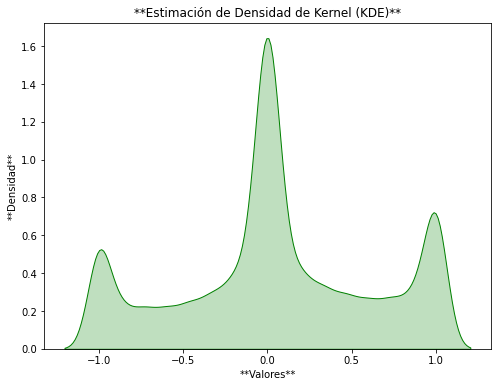

In [21]:
# Chat GPT generated (I don't know why in Spanish)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df[df["DrawFrequency"] == 1]["utility_agent1"], kde=False, bins=100, color='blue')
plt.title('**Distribución de la Variable**')
plt.xlabel('**Valores**')
plt.ylabel('**Frecuencia**')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df[df["DrawFrequency"] == 1]["utility_agent1"], shade=True, color='green')
plt.title('**Estimación de Densidad de Kernel (KDE)**')
plt.xlabel('**Valores**')
plt.ylabel('**Densidad**')
plt.show()

In [ ]:
from tqdm import tqdm

def find_special_binary_features(df, groupcolumn):
    binary_features = [col for col in df.columns if df[col].nunique() == 2]
    special_features = []

    for feature in tqdm(binary_features):
        unique_values = df[feature].unique()
        
        for value in unique_values:
            groups_with_value = df.groupby(groupcolumn).apply(lambda grp: (grp[feature] == value).all())
            if sum(groups_with_value) == 1:
                specific_group = groups_with_value[groups_with_value].index[0]
                if df[df[groupcolumn] != specific_group][feature].nunique() == 1 and \
                   df[df[groupcolumn] != specific_group][feature].unique() != [value]:
                    special_features.append(feature)
                    break

    return special_features

binary_features = find_special_binary_features(df, "GameRulesetName")
print(f"Special Binary Features: {binary_features}")

100%|██████████| 382/382 [10:16<00:00,  1.61s/it] 

Special Binary Features: ['Cooperation', 'Team', 'SpiralShape', 'StarShape', 'SpiralTiling', 'MancalaSixRows', 'AlquerqueBoardWithEightTriangles', 'StarBoard', 'PachisiBoard', 'AutoMove', 'RotationDecision', 'RotationDecisionFrequency', 'SetRotationFrequency', 'PathExtent', 'RightwardsDirection', 'LeftwardsDirection', 'LineDraw', 'GroupLoss', 'GroupDraw', 'LoopLoss', 'PathExtentEnd', 'PathExtentWin', 'PathExtentLoss', 'ReachLossFrequency', 'ScoringDraw', 'JanggiStyle']


In [ ]:
corr = df.corr()

<ipython-input-93-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [ ]:
corr.shape

(593, 593)

In [ ]:
corr_matrix = corr.abs()

upper_triangle = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(pd.np.bool))

# Find columns with correlation equal to 1 (perfect correlation)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] == 1)]

print(to_drop)
print(len(to_drop))

['AsymmetricForces', 'AsymmetricPiecesType', 'Team', 'CircleTiling', 'SpiralTiling', 'NumPerimeterSites', 'PieceDirection', 'SwapOption', 'NumStartComponentsBoardPerPlayer', 'NumStartComponentsHandPerPlayer', 'NumStartComponentsPerPlayer', 'ShootDecisionFrequency', 'Roll', 'Sow', 'SowOriginFirst', 'SetRotation', 'SetRotationFrequency', 'PathExtent', 'LeftwardDirection', 'LeftwardsDirection', 'ForwardRightDirection', 'BackwardRightDirection', 'LoopEnd', 'LoopWinFrequency', 'LoopLoss', 'PatternWin', 'PatternWinFrequency', 'PathExtentEnd', 'PathExtentWin', 'PathExtentLoss', 'TerritoryEnd', 'TerritoryWin', 'TerritoryWinFrequency', 'NoProgressDrawFrequency', 'MancalaStyle', 'ShibumiStyle', 'StackState']
37


<ipython-input-100-eab8fd782645>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  upper_triangle = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(pd.np.bool))
<ipython-input-100-eab8fd782645>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(pd.np.bool))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

threshold = 1
highly_correlated_features = []

for col in corr.columns:
    for index, value in corr[col].iteritems():
        if abs(value) >= threshold and col != index:
            highly_correlated_features.append((col, index, value))

print("\nHighly Correlated Feature Pairs:")
for item in highly_correlated_features:
    print(f"Feature Pair: {item[0]}, {item[1]} with Correlation: {item[2]}")

print(len(highly_correlated_features))



Highly Correlated Feature Pairs:
Feature Pair: Asymmetric, AsymmetricForces with Correlation: 1.0
Feature Pair: Asymmetric, AsymmetricPiecesType with Correlation: 1.0
Feature Pair: AsymmetricForces, Asymmetric with Correlation: 1.0
Feature Pair: AsymmetricForces, AsymmetricPiecesType with Correlation: 1.0
Feature Pair: AsymmetricPiecesType, Asymmetric with Correlation: 1.0
Feature Pair: AsymmetricPiecesType, AsymmetricForces with Correlation: 1.0
Feature Pair: PlayersWithDirections, PieceDirection with Correlation: 1.0
Feature Pair: Cooperation, Team with Correlation: 1.0
Feature Pair: Team, Cooperation with Correlation: 1.0
Feature Pair: SpiralShape, SpiralTiling with Correlation: 1.0
Feature Pair: CircleShape, CircleTiling with Correlation: 1.0
Feature Pair: SquarePyramidalShape, ShibumiStyle with Correlation: 1.0
Feature Pair: CircleTiling, CircleShape with Correlation: 1.0
Feature Pair: SpiralTiling, SpiralShape with Correlation: 1.0
Feature Pair: MancalaBoard, Sow with Correlatio

<ipython-input-98-8fb938118701>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in corr[col].iteritems():


In [ ]:
import numpy as np

tmp = corr.abs().mask(np.eye(len(corr), dtype=bool))
tmp = tmp[tmp > 0.9]
s = tmp.unstack().dropna()

corr_df = pd.DataFrame(s.index.tolist(), columns=['feature1', 'feature2'])

ValueError: Array conditional must be same shape as self

In [ ]:
corr = corr.dropna(axis=1, how='all')

In [ ]:
corr["utility_agent1"].sort_values(ascending=False)

utility_agent1              1.000000
num_wins_agent1             0.887889
AdvantageP1                 0.443145
PiecesPlacedOutsideBoard    0.088630
Phase                       0.077968
                              ...   
SetHiddenRotation                NaN
SetHiddenState                   NaN
SetHiddenValue                   NaN
SetHiddenWhat                    NaN
SetHiddenWho                     NaN
Name: utility_agent1, Length: 809, dtype: float64

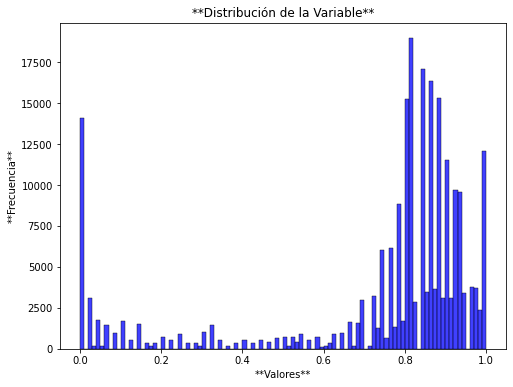

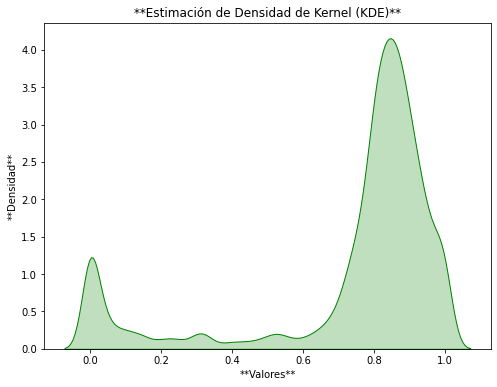

In [ ]:
# Chat GPT generated (I don't know why in Spanish)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['Balance'], kde=False, bins=100, color='blue')
plt.title('**Distribución de la Variable**')
plt.xlabel('**Valores**')
plt.ylabel('**Frecuencia**')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df['Balance'], shade=True, color='green')
plt.title('**Estimación de Densidad de Kernel (KDE)**')
plt.xlabel('**Valores**')
plt.ylabel('**Densidad**')
plt.show()

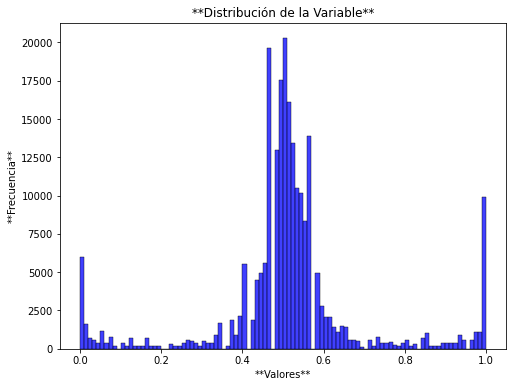

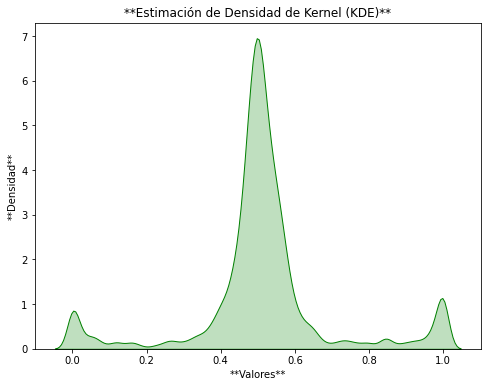

In [ ]:
# Chat GPT generated (I don't know why in Spanish)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['AdvantageP1'], kde=False, bins=100, color='blue')
plt.title('**Distribución de la Variable**')
plt.xlabel('**Valores**')
plt.ylabel('**Frecuencia**')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df['AdvantageP1'], shade=True, color='green')
plt.title('**Estimación de Densidad de Kernel (KDE)**')
plt.xlabel('**Valores**')
plt.ylabel('**Densidad**')
plt.show()

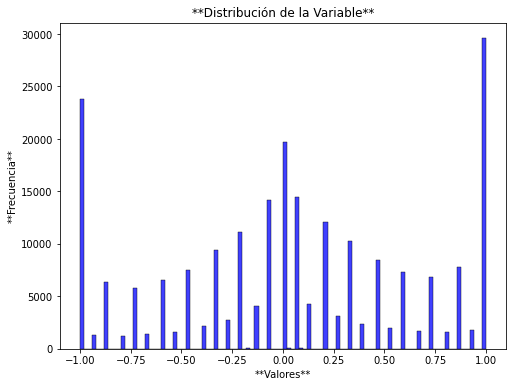

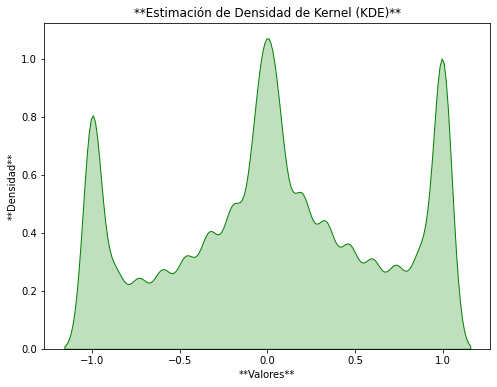

In [ ]:
# Chat GPT generated (I don't know why in Spanish)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['utility_agent1'], kde=False, bins=100, color='blue')
plt.title('**Distribución de la Variable**')
plt.xlabel('**Valores**')
plt.ylabel('**Frecuencia**')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df['utility_agent1'], shade=True, color='green')
plt.title('**Estimación de Densidad de Kernel (KDE)**')
plt.xlabel('**Valores**')
plt.ylabel('**Densidad**')
plt.show()

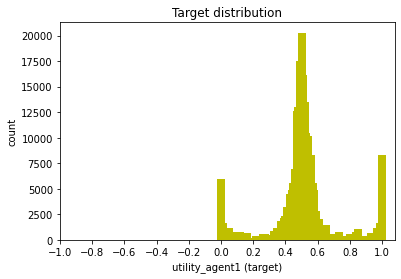

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(*np.unique(df['AdvantageP1'].to_numpy(), return_counts=True), width=0.05, color='y')
plt.xlabel('utility_agent1 (target)')
plt.ylabel('count')
plt.xticks(np.linspace(-1, 1, 11))
plt.title('Target distribution')
plt.show()

In [ ]:
df = df[df["LudRules"].apply(lambda x: "start" in x)]

In [ ]:
df["LudRules"].tolist()[10]

'(game "1D Chess" (players 2) (equipment { (board (rectangle 1 8)) (piece "Rook" Each (move Slide Orthogonal (to if:(is Enemy (who at:(to))) (apply (remove (to)))) ) ) (piece "King" Each (move Step (to if:(not (is Friend (who at:(to)))) (apply (if (is Enemy (who at:(to))) (remove (to)))) ) ) ) (piece "Knight" Each (move Leap { { F F } } (to if:(not (is Friend (who at:(to)))) (apply (if (is Enemy (who at:(to))) (remove (to)))) ) ) ) } ) (rules (start { (place "Rook1" coord:"C1") (place "Knight1" coord:"B1") (place "King1" coord:"A1") (place "Rook2" coord:"F1") (place "Knight2" coord:"G1") (place "King2" coord:"H1") } ) (play (do (forEach Piece) ifAfterwards:(not (is Threatened (id "King" Mover))) ) ) (end { (if (and (is Threatened (id "King" Next)) (not (can Move (do (forEach Piece Next) ifAfterwards:(not (is Threatened (id "King" Next)) ) ) ) ) ) (result Mover Win) ) (if (or (no Moves Mover) (= (counter) 100)) (result Mover Draw) ) } ) ) )'

In [ ]:
df.value_counts()

Series([], dtype: int64)

In [ ]:
f = pd.read_csv('/home/toefl/K/MCTS/dataset/feature_importance_src.csv')

In [29]:
df["OutcomeUniformity"].value_counts()

 1.00    23412
-0.02    18602
-0.00    17724
-0.01    16442
 0.02    14714
         ...  
 0.90      180
 0.54      178
 0.47      172
 0.64      172
 0.40      162
Name: OutcomeUniformity, Length: 102, dtype: int64

In [ ]:
f.head(50)

,Unnamed: 0,feature,importance
0,597,src_AdvantageP1,15.530264
1,424,Balance,4.956622
2,591,src_p2_selection,4.010179
3,596,src_p2_agent,2.901193
4,593,src_p2_playout,2.842518
5,417,DurationTurnsNotTimeouts,2.223013
6,605,src_selection_exploration,2.194143
7,419,GameTreeComplexity,2.135121
8,585,PlayoutsPerSecond,2.056824
9,428,OutcomeUniformity,1.743090


In [ ]:
len(f[f["importance"] < 0.001]["feature"].tolist())

82

In [1]:
import pandas as pd
f = pd.read_csv('/home/toefl/K/MCTS/dataset/feature_importance_openfe.csv')

In [10]:
[c for c in f["feature"] if "Id" == c]

[]

In [9]:
print([c for c in f["feature"].tolist() if "autoFE" in c][:50])

['autoFE_f_112', 'autoFE_f_468', 'autoFE_f_386', 'autoFE_f_6', 'autoFE_f_333', 'autoFE_f_357', 'autoFE_f_353', 'autoFE_f_194', 'autoFE_f_59', 'autoFE_f_174', 'autoFE_f_191', 'autoFE_f_182', 'autoFE_f_436', 'autoFE_f_261', 'autoFE_f_328', 'autoFE_f_189', 'autoFE_f_8', 'autoFE_f_275', 'autoFE_f_279', 'autoFE_f_223', 'autoFE_f_154', 'autoFE_f_319', 'autoFE_f_221', 'autoFE_f_218', 'autoFE_f_380', 'autoFE_f_402', 'autoFE_f_276', 'autoFE_f_1', 'autoFE_f_253', 'autoFE_f_362', 'autoFE_f_294', 'autoFE_f_108', 'autoFE_f_484', 'autoFE_f_11', 'autoFE_f_200', 'autoFE_f_356', 'autoFE_f_491', 'autoFE_f_2', 'autoFE_f_248', 'autoFE_f_176', 'autoFE_f_449', 'autoFE_f_335', 'autoFE_f_310', 'autoFE_f_479', 'autoFE_f_322', 'autoFE_f_446', 'autoFE_f_198', 'autoFE_f_116', 'autoFE_f_206', 'autoFE_f_214']


In [25]:
len(['autoFE_f_112', 'autoFE_f_468', 'autoFE_f_386', 'autoFE_f_6', 'autoFE_f_333', 'autoFE_f_357', 'autoFE_f_353', 'autoFE_f_194', 'autoFE_f_59', 'autoFE_f_174', 'autoFE_f_191', 'autoFE_f_182', 'autoFE_f_436', 'autoFE_f_261', 'autoFE_f_328', 'autoFE_f_189', 'autoFE_f_8', 'autoFE_f_275', 'autoFE_f_279', 'autoFE_f_223', 'autoFE_f_154', 'autoFE_f_319', 'autoFE_f_221', 'autoFE_f_218', 'autoFE_f_380', 'autoFE_f_402', 'autoFE_f_276', 'autoFE_f_1', 'autoFE_f_253', 'autoFE_f_362', 'autoFE_f_294', 'autoFE_f_108', 'autoFE_f_484', 'autoFE_f_11', 'autoFE_f_200', 'autoFE_f_356', 'autoFE_f_491', 'autoFE_f_2', 'autoFE_f_248', 'autoFE_f_176', 'autoFE_f_449', 'autoFE_f_335', 'autoFE_f_310', 'autoFE_f_479', 'autoFE_f_322', 'autoFE_f_446', 'autoFE_f_198', 'autoFE_f_116', 'autoFE_f_206', 'autoFE_f_214'])

50

In [1]:
valid_columns = ['autoFE_f_112', 'autoFE_f_468', 'autoFE_f_386', 'autoFE_f_6', 'autoFE_f_333', 'autoFE_f_357', 'autoFE_f_353', 'autoFE_f_194', 'autoFE_f_59', 'autoFE_f_174', 'autoFE_f_191', 'autoFE_f_182', 'autoFE_f_436', 'autoFE_f_261', 'autoFE_f_328', 'autoFE_f_189', 'autoFE_f_8', 'autoFE_f_275', 'autoFE_f_279', 'autoFE_f_223', 'autoFE_f_154', 'autoFE_f_319', 'autoFE_f_221', 'autoFE_f_218', 'autoFE_f_380', 'autoFE_f_402', 'autoFE_f_276', 'autoFE_f_1', 'autoFE_f_253', 'autoFE_f_362', 'autoFE_f_294', 'autoFE_f_108', 'autoFE_f_484', 'autoFE_f_11', 'autoFE_f_200', 'autoFE_f_356', 'autoFE_f_491', 'autoFE_f_2', 'autoFE_f_248', 'autoFE_f_176', 'autoFE_f_449', 'autoFE_f_335', 'autoFE_f_310', 'autoFE_f_479', 'autoFE_f_322', 'autoFE_f_446', 'autoFE_f_198', 'autoFE_f_116', 'autoFE_f_206', 'autoFE_f_214']

In [3]:
valid_features = [int(f.split('_')[-1]) for f in valid_columns]

In [5]:
print(valid_features)

[112, 468, 386, 6, 333, 357, 353, 194, 59, 174, 191, 182, 436, 261, 328, 189, 8, 275, 279, 223, 154, 319, 221, 218, 380, 402, 276, 1, 253, 362, 294, 108, 484, 11, 200, 356, 491, 2, 248, 176, 449, 335, 310, 479, 322, 446, 198, 116, 206, 214]


In [ ]:
# # Area features.

#         area_features = [
#             "NumPlayableSitesOnBoard",
#             "NumColumns",
#             "NumRows",
#             "NumCorners",
#             "NumDirections",
#             "NumOrthogonalDirections",
#             "NumDiagonalDirections",
#             "NumAdjacentDirections",
#             "NumOffDiagonalDirections",
#             "NumOuterSites",
#             "NumInnerSites",
#             "NumLayers",
#             "NumEdges",
#             "NumCells",
#             "NumVertices",
#             "NumPerimeterSites",
#             "NumTopSites",
#             "NumBottomSites",
#             "NumRightSites",
#             "NumLeftSites",
#             "NumCentreSites",
#             "NumConvexCorners",
#             "NumConcaveCorners",
#             "NumPhasesBoard",
#             "Hand",
#             "NumContainers",
#             "NumPlayableSites"
#         ]

#         for feature in area_features:
#             df[f"q_{feature}"] = df[feature] % 2

In [ ]:
print([column for column in f.feature.tolist() if 'src' in column])

['src_AdvantageP1', 'src_p2_selection', 'src_AdvantageBalanceRatio', 'src_p2_playout', 'src_p2_agent', 'src_selection_exploration', 'src_p2_exploration', 'src_AdvantageTimeImpact', 'src_exploration_selection', 'src_OutcomeUniformityAdvantageP1', 'src_p1_playout', 'src_p1_selection', 'src_selection_playout', 'src_playout_playout', 'src_exploration_playout', 'src_selection_selection', 'src_selection_bounds', 'src_playout_bounds', 'src_p1_exploration', 'src_playout_selection', 'src_exploration_bounds', 'src_playout_exploration', 'src_bounds_selection', 'src_p1_agent', 'src_exploration_exploration', 'src_p2_bounds', 'src_bounds_playout', 'src_bounds_exploration', 'src_agent_agent', 'src_playout_agent', 'src_agent_playout', 'src_exploration_agent', 'src_bounds_agent', 'src_agent_exploration', 'src_agent_selection', 'src_agent_bounds', 'src_p1_bounds', 'src_selection_agent', 'src_bounds_bounds']


In [ ]:
f[f["feature"] == "src_AdvantageP1"]

,Unnamed: 0,feature,importance
457,587,src_AdvantageP1,0.019873


In [ ]:
f

NameError: name 'f' is not defined

In [1]:
import pickle
with open('catcols.pickle', 'rb') as file:
    catcols = pickle.load(file)

In [2]:
print(catcols)

['src_p1_selection', 'src_p1_exploration', 'src_p1_playout', 'src_p1_bounds', 'src_p2_selection', 'src_p2_exploration', 'src_p2_playout', 'src_p2_bounds', 'src_agent1', 'src_agent2']


In [ ]:
            # X_train = X_train.rename(columns={"src_Balance": "Balance"})
            # X_valid_src = X_valid_src.rename(columns={"src_Balance": "Balance"})
            # X_valid_tta = X_valid_tta.rename(columns={"src_Balance": "Balance"})

In [2]:
import pandas as pd
f = pd.read_csv('/home/toefl/K/MCTS/dataset/feature_importance.csv')

In [3]:
f.shape

(689, 3)

In [4]:
len(f[f["importance"] < 0.01])

294

In [11]:
f.head(50)

,Unnamed: 0,feature,importance
0,591,src_p2_selection,4.206645
1,593,src_p2_playout,3.474409
2,596,src_p2_agent,2.564668
3,622,src_selection_exploration,2.418042
4,646,autoFE_f_112,1.919306
5,641,autoFE_f_6,1.732255
6,589,src_p1_playout,1.724450
7,417,DurationTurnsNotTimeouts,1.650537
8,685,autoFE_f_468,1.548603
9,626,src_exploration_selection,1.455912


In [10]:
print(f[f["importance"] < 0.01]["feature"].tolist())

['PieceState', 'GraphStyle', 'MovesOperators', 'SowCCW', 'ScoreDifferenceMedian', 'AbsoluteDirections', 'PushEffectFrequency', 'LineWin', 'LeapDecisionToEmptyFrequency', 'AlquerqueBoardWithOneTriangle', 'TaflStyle', 'Capture', 'Even', 'RegularShape', 'SlideDecisionToFriendFrequency', 'SwapPiecesDecisionFrequency', 'AddDecision', 'LineLossFrequency', 'CheckmateFrequency', 'Multiplication', 'MoveAgain', 'TriangleTiling', 'SetSiteState', 'SwapPlayersDecision', 'RemoveDecision', 'LineOfSight', 'CaptureEnd', 'SquareTiling', 'ForwardsDirection', 'NoProgressEndFrequency', 'Draw', 'Odd', 'Parity', 'ConnectionLossFrequency', 'NoMovesWin', 'SurakartaStyle', 'Checkmate', 'TrackLoop', 'StepEffect', 'StepDecisionToFriend', 'Maximum', 'HopEffect', 'NineMensMorrisBoard', 'TriangleShape', 'FillWinFrequency', 'Style', 'FlipFrequency', 'VoteEffect', 'NoMoves', 'Meta', 'GroupEndFrequency', 'Hand', 'NoMovesEnd', 'CountPiecesMoverComparison', 'FromToDecision', 'StackType', 'IsEnemy', 'AlquerqueBoardWithFou

In [ ]:
f.head(50)

,Unnamed: 0,feature,importance
0,597,src_AdvantageP1,9.871521
1,424,Balance,4.842335
2,591,src_p2_selection,4.008353
3,612,src_AdvantageBalanceRatio,3.788492
4,593,src_p2_playout,3.188467
5,596,src_p2_agent,3.068649
6,622,src_selection_exploration,2.258221
7,592,src_p2_exploration,1.821703
8,613,src_AdvantageTimeImpact,1.776630
9,417,DurationTurnsNotTimeouts,1.675810


In [2]:
sorted([112, 468, 386, 6, 333, 357, 353, 194, 59, 174, 191, 182, 436, 261, 328, 189, 8, 275, 279, 223, 154, 319, 221, 218, 380, 402, 276, 1, 253, 362, 294, 108, 484, 11, 200, 356, 491, 2, 248, 176, 449, 335, 310, 479, 322, 446, 198, 116, 206, 214])

[1,
 2,
 6,
 8,
 11,
 59,
 108,
 112,
 116,
 154,
 174,
 176,
 182,
 189,
 191,
 194,
 198,
 200,
 206,
 214,
 218,
 221,
 223,
 248,
 253,
 261,
 275,
 276,
 279,
 294,
 310,
 319,
 322,
 328,
 333,
 335,
 353,
 356,
 357,
 362,
 380,
 386,
 402,
 436,
 446,
 449,
 468,
 479,
 484,
 491]

In [ ]:
df.shape

(233234, 814)

In [ ]:
dfs = df.copy()

In [ ]:
dft = dfs[(dfs["GameRulesetName"] == df["GameRulesetName"]) & (dfs["agent1"] == df["agent2"]) & (dfs["agent2"] == df["agent1"])]

In [ ]:
dft.shape

(0, 814)

In [ ]:

d1 = df["AdvantageP1"]
d2 = df["MoveDistanceMaxDecrease"]
d1.groupby(d2).rank(ascending=True, pct=True).nunique()

390

In [ ]:
import pickle

with open('feature.pickle', 'rb') as file:
    feature = pickle.load(file)

In [ ]:
feature[0].name

'GroupByThenRank'

In [1]:
import polars as pl

sub = pl.read_parquet('/home/toefl/K/MCTS/submission.parquet')

In [2]:
sub

Id,utility_agent1
i64,f64
233234,0.166916
233236,-0.005776
233235,-0.166916


In [ ]:
sub

Id,utility_agent1
i64,f64
233234,0.185311
233236,0.014517
233235,-0.185311


In [ ]:
sub

Id,utility_agent1
i64,f64
233234,0.023419
233235,-0.028186
233236,0.00731


In [ ]:
sub

Id,utility_agent1
i64,f64
233234,0.191369
233236,0.023886
233235,-0.191369


In [ ]:
df["agent1"].nunique()

72

In [ ]:
df["agent"] = df["agent1"] + "_" + df["agent2"] 

In [ ]:
df[["agent", "utility_agent1"]].groupby("agent").mean().sort_values(by="utility_agent1").to_csv('dataset/avg.csv')

In [ ]:
df[["GameRulesetName", "utility_agent1"]].groupby("GameRulesetName").mean().sort_values(by="utility_agent1").to_csv('dataset/avg_game.csv')

In [ ]:
oof_labels = artifacts["catboost"]["oof_labels"]
oof_preds = artifacts["catboost"]["oof_preds"]

oof_preds_fixed = oof_preds.copy()
oof_preds_fixed[df["GameTreeComplexity"] == 0] = 2 * df[df["GameTreeComplexity"] == 0]["src_AdvantageP1"] - 1

In [ ]:
oof_labels[:5]

array([-0.46666667, -0.33333333, -0.06666667, -0.33333333, -0.33333333])

0.40186378136362766

In [2]:
import pickle
with open('checkpoints/solver_checkpoint.pickle', 'rb') as file:
    data = pickle.load(file)

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Generar predicciones y etiquetas aleatorias
np.random.seed(42)  # para resultados reproducibles
predicciones = np.random.rand(1000) / 2 + 1  # 10 predicciones aleatorias
etiquetas = np.random.rand(1000) / 2 + 1    # 10 etiquetas aleatorias

# Calcular el RMSE
mse = mean_squared_error(etiquetas, predicciones)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

mse = mean_squared_error(etiquetas * 2 - 1, predicciones* 2 - 1)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 0.20361155521938443
RMSE: 0.40722311043876885


In [ ]:
data["catboost"].keys()

dict_keys(['features', 'oof_score', 'models'])

In [ ]:
oof_labels = data["catboost"]["oof_labels"]
oof_preds = data["catboost"]["oof_preds"]

KeyError: 'oof_label'

In [ ]:
slc = df[df["GameTreeComplexity"] == 0][["AdvantageP1", "utility_agent1"]]
mse = abs(slc["AdvantageP1"] - (slc["utility_agent1"] + 1) / 2)

In [ ]:
mse.mean()

0.0384825327510917

In [ ]:
for f in df.columns.tolist():
    if 'src' in f:
        print(f)

In [ ]:
df["utility_agent1"].nunique()

NameError: name 'df' is not defined

In [ ]:
import pickle

with open('feature.pickle', 'rb') as file:
    feature = pickle.load(file)

In [ ]:
print(len(feature))

15924


In [ ]:
import sys
sys.path.append('/home/toefl/K/MCTS/dataset/')
import kaggle_evaluation.mcts_inference_server

In [ ]:
    # self.model_paths=[]
    # self.tfidf_paths=[]

    # def train_model(self,):

    #     X_train=self.CV_feats(X_train,mode='train',model_name=model_name,fold=fold)
    #     X_valid=self.CV_feats(X_valid,mode='test',model_name=model_name,fold=fold)


    # def infer_model(self,test):
    #     test=self.FE(test,mode='test')
    #     test.drop(['GameRulesetName'],axis=1,inplace=True)
    #     test_copy=self.CV_feats(test.copy(),mode='test',model_name=model_name,fold=fold)

In [ ]:
        # m = {}
        # for i, u in enumerate(Y.unique()):
        #     m[u] = i
        # Y = Y.map(m)

In [ ]:
        # # Custom features.

        # df = df.with_columns([
        #     (pl.col('PlayoutsPerSecond') / (pl.col('MovesPerSecond') + 1e-15)).alias('Playouts/Moves'),
        #     (pl.col('MovesPerSecond') / (pl.col('PlayoutsPerSecond') + 1e-15)).alias('EfficiencyPerPlayout'),
        #     (pl.col('DurationActions') / (pl.col('DurationTurnsStdDev') + 1e-15)).alias('TurnsDurationEfficiency'),
        #     (pl.col('DurationActions') / (pl.col('MovesPerSecond') + 1e-15)).alias('ActionTimeEfficiency'),
        #     (pl.col('DurationTurnsStdDev') / (pl.col('DurationActions') + 1e-15)).alias('StandardizedTurnsEfficiency'),
        #     (pl.col('DurationActions') / (pl.col('StateTreeComplexity') + 1e-15)).alias('DurationToComplexityRatio'),
        #     (pl.col('GameTreeComplexity') / (pl.col('StateTreeComplexity') + 1e-15)).alias('NormalizedGameTreeComplexity'),
        #     (pl.col('Balance') * pl.col('GameTreeComplexity')).alias('ComplexityBalanceInteraction'),
        #     (pl.col('StateTreeComplexity') + pl.col('GameTreeComplexity')).alias('OverallComplexity'),
        #     (pl.col('GameTreeComplexity') / (pl.col('PlayoutsPerSecond') + 1e-15)).alias('ComplexityPerPlayout'),
        #     (pl.col('DurationTurnsNotTimeouts') / (pl.col('MovesPerSecond') + 1e-15)).alias('TurnsNotTimeouts/Moves'),
        #     (pl.col('Timeouts') / (pl.col('DurationActions') + 1e-15)).alias('Timeouts/DurationActions'),
        #     (pl.col('StepDecisionToEnemy') + pl.col('SlideDecisionToEnemy') + pl.col('HopDecisionMoreThanOne')).alias('ComplexDecisionRatio'),
        #     (pl.col('StepDecisionToEnemy') + 
        #      pl.col('HopDecisionEnemyToEnemy') + 
        #      pl.col('HopDecisionFriendToEnemy') + 
        #      pl.col('SlideDecisionToEnemy')).alias('AggressiveActionsRatio'),

        #     (pl.col('src_AdvantageP1') / (pl.col('Balance') + 1e-15)).alias('src_AdvantageBalanceRatio'),
        #     (pl.col('src_AdvantageP1') / (pl.col('DurationActions') + 1e-15)).alias('src_AdvantageTimeImpact'),
        #     (pl.col('OutcomeUniformity') / (pl.col('src_AdvantageP1') + 1e-15)).alias('src_OutcomeUniformity/AdvantageP1'),

        #     (pl.col('tta_AdvantageP1') / (pl.col('Balance') + 1e-15)).alias('tta_AdvantageBalanceRatio'),
        #     (pl.col('tta_AdvantageP1') / (pl.col('DurationActions') + 1e-15)).alias('tta_AdvantageTimeImpact'),
        #     (pl.col('OutcomeUniformity') / (pl.col('tta_AdvantageP1') + 1e-15)).alias('tta_OutcomeUniformity/AdvantageP1'),
        # ])

In [ ]:
# Y_train = Y_train.astype(np.float64)
#             X[src_columns].to_csv('Xtrain.csv')
#             Y.to_csv('Ytrain.csv')

#             print('here')

#             ofe = OpenFE()
#             features = ofe.fit(data=X_train, label=Y_train.astype(np.float64))
#             print(features)
#             train_x, _ = transform(X_train, X_valid, features)
#             train_x.to_csv('features.csv')

In [ ]:
    #   def ARI(txt):
    #         characters = len(txt)
    #         words = len(re.split(' |\\n|\\.|\\?|\\!|\,', txt))
    #         sentence = len(re.split('\\.|\\?|\\!', txt))
    #         ari_score = 4.71*(characters/words)+0.5*(words/sentence)-21.43
    #         return ari_score

    #     def McAlpine_EFLAW(txt):
    #         W = len(re.split(' |\\n|\\.|\\?|\\!|\,', txt))
    #         S = len(re.split('\\.|\\?|\\!', txt))
    #         mcalpine_eflaw_score = (W+S*W)/S
    #         return mcalpine_eflaw_score
        
    #     def CLRI(txt):
    #         characters = len(txt)
    #         words = len(re.split(' |\\n|\\.|\\?|\\!|\,', txt))
    #         sentence = len(re.split('\\.|\\?|\\!', txt))
    #         L = 100*characters/words
    #         S = 100*sentence/words
    #         clri_score = 0.0588*L-0.296*S-15.8
    #         return clri_score
        
    #     def drop_gamename(rule):
    #         rule = rule[len('(game "'):]
    #         for i in range(len(rule)):
    #             if rule[i] == '"':
    #                 return rule[i+1:]
                
    #     def get_player(rule):
    #         player = ''
    #         stack = []
    #         for i in range(len(rule)):
    #             player += rule[i]
    #             if rule[i] in ['(', '{']:
    #                 stack.append(rule[i])
    #             elif rule[i] in [')', '}']:
    #                 stack = stack[:-1]
    #                 if len(stack) == 0:
    #                     return player

In [ ]:
# Player position (positive / negative).

        # total_agent = ['MCTS-ProgressiveHistory-0.1-MAST-false', 'MCTS-ProgressiveHistory-0.1-MAST-true', 'MCTS-ProgressiveHistory-0.1-NST-false', 'MCTS-ProgressiveHistory-0.1-NST-true', 'MCTS-ProgressiveHistory-0.1-Random200-false', 'MCTS-ProgressiveHistory-0.1-Random200-true', 'MCTS-ProgressiveHistory-0.6-MAST-false', 'MCTS-ProgressiveHistory-0.6-MAST-true', 'MCTS-ProgressiveHistory-0.6-NST-false', 'MCTS-ProgressiveHistory-0.6-NST-true', 'MCTS-ProgressiveHistory-0.6-Random200-false', 'MCTS-ProgressiveHistory-0.6-Random200-true', 'MCTS-ProgressiveHistory-1.41421356237-MAST-false', 'MCTS-ProgressiveHistory-1.41421356237-MAST-true', 'MCTS-ProgressiveHistory-1.41421356237-NST-false', 'MCTS-ProgressiveHistory-1.41421356237-NST-true', 'MCTS-ProgressiveHistory-1.41421356237-Random200-false', 'MCTS-ProgressiveHistory-1.41421356237-Random200-true', 'MCTS-UCB1-0.1-MAST-false', 'MCTS-UCB1-0.1-MAST-true', 'MCTS-UCB1-0.1-NST-false', 'MCTS-UCB1-0.1-NST-true', 'MCTS-UCB1-0.1-Random200-false', 'MCTS-UCB1-0.1-Random200-true', 'MCTS-UCB1-0.6-MAST-false', 'MCTS-UCB1-0.6-MAST-true', 'MCTS-UCB1-0.6-NST-false', 'MCTS-UCB1-0.6-NST-true', 'MCTS-UCB1-0.6-Random200-false', 'MCTS-UCB1-0.6-Random200-true', 'MCTS-UCB1-1.41421356237-MAST-false', 'MCTS-UCB1-1.41421356237-MAST-true', 'MCTS-UCB1-1.41421356237-NST-false', 'MCTS-UCB1-1.41421356237-NST-true', 'MCTS-UCB1-1.41421356237-Random200-false', 'MCTS-UCB1-1.41421356237-Random200-true', 'MCTS-UCB1GRAVE-0.1-MAST-false', 'MCTS-UCB1GRAVE-0.1-MAST-true', 'MCTS-UCB1GRAVE-0.1-NST-false', 'MCTS-UCB1GRAVE-0.1-NST-true', 'MCTS-UCB1GRAVE-0.1-Random200-false', 'MCTS-UCB1GRAVE-0.1-Random200-true', 'MCTS-UCB1GRAVE-0.6-MAST-false', 'MCTS-UCB1GRAVE-0.6-MAST-true', 'MCTS-UCB1GRAVE-0.6-NST-false', 'MCTS-UCB1GRAVE-0.6-NST-true', 'MCTS-UCB1GRAVE-0.6-Random200-false', 'MCTS-UCB1GRAVE-0.6-Random200-true', 'MCTS-UCB1GRAVE-1.41421356237-MAST-false', 'MCTS-UCB1GRAVE-1.41421356237-MAST-true', 'MCTS-UCB1GRAVE-1.41421356237-NST-false', 'MCTS-UCB1GRAVE-1.41421356237-NST-true', 'MCTS-UCB1GRAVE-1.41421356237-Random200-false', 'MCTS-UCB1GRAVE-1.41421356237-Random200-true', 'MCTS-UCB1Tuned-0.1-MAST-false', 'MCTS-UCB1Tuned-0.1-MAST-true', 'MCTS-UCB1Tuned-0.1-NST-false', 'MCTS-UCB1Tuned-0.1-NST-true', 'MCTS-UCB1Tuned-0.1-Random200-false', 'MCTS-UCB1Tuned-0.1-Random200-true', 'MCTS-UCB1Tuned-0.6-MAST-false', 'MCTS-UCB1Tuned-0.6-MAST-true', 'MCTS-UCB1Tuned-0.6-NST-false', 'MCTS-UCB1Tuned-0.6-NST-true', 'MCTS-UCB1Tuned-0.6-Random200-false', 'MCTS-UCB1Tuned-0.6-Random200-true', 'MCTS-UCB1Tuned-1.41421356237-MAST-false', 'MCTS-UCB1Tuned-1.41421356237-MAST-true', 'MCTS-UCB1Tuned-1.41421356237-NST-false', 'MCTS-UCB1Tuned-1.41421356237-NST-true', 'MCTS-UCB1Tuned-1.41421356237-Random200-false', 'MCTS-UCB1Tuned-1.41421356237-Random200-true']
        
        # agent1, agent2 = df['src_p1_agent'].values, df['src_p2_agent'].values
        # for i in range(len(total_agent)):
        #     value = np.zeros(len(df))
        #     for j in range(len(df)):
        #         if agent1[j] == total_agent[i]:
        #             value[j] += 1
        #         elif agent2[j] == total_agent[i]:
        #             value[j] -= 1
        #     df[f'src_agent_{total_agent[i]}'] = value
        
        # agent1, agent2 = df['tta_p1_agent'].values, df['tta_p2_agent'].values
        # for i in range(len(total_agent)):
        #     value = np.zeros(len(df))
        #     for j in range(len(df)):
        #         if agent1[j] == total_agent[i]:
        #             value[j] += 1
        #         elif agent2[j] == total_agent[i]:
        #             value[j] -= 1
        #     df[f'tta_agent_{total_agent[i]}'] = value

        # # One-hot encoding.

        # onehot_cols = [['NumOffDiagonalDirections', [0.0, 4.82, 2.0, 5.18, 3.08, 0.06]], ['NumLayers', [1, 0, 4, 5]], ['NumPhasesBoard', [3, 2, 1, 5, 4]], ['NumContainers', [1, 4, 3, 2]], ['NumDice', [0, 2, 1, 4, 6, 3, 5, 7]], ['ProposeDecisionFrequency', [0.0, 0.05, 0.01]], ['PromotionDecisionFrequency', [0.0, 0.01, 0.03, 0.02, 0.11, 0.05, 0.04]], ['SlideDecisionToFriendFrequency', [0.0, 0.19, 0.06]], ['LeapDecisionToEnemyFrequency', [0.0, 0.04, 0.01, 0.02, 0.07, 0.03, 0.14, 0.08]], ['HopDecisionFriendToFriendFrequency', [0.0, 0.13, 0.09]], ['HopDecisionEnemyToEnemyFrequency', [0.0, 0.01, 0.2, 0.03]], ['HopDecisionFriendToEnemyFrequency', [0.0, 0.01, 0.09, 0.25, 0.02]], ['FromToDecisionFrequency', [0.0, 0.38, 1.0, 0.31, 0.94, 0.67]], ['ProposeEffectFrequency', [0.0, 0.01, 0.03]], ['PushEffectFrequency', [0.0, 0.5, 0.96, 0.25]], ['FlipFrequency', [0.0, 0.87, 1.0, 0.96]], ['SetCountFrequency', [0.0, 0.62, 0.54, 0.02]], ['DirectionCaptureFrequency', [0.0, 0.55, 0.54]], ['EncloseCaptureFrequency', [0.0, 0.08, 0.1, 0.07, 0.12, 0.02, 0.09]], ['InterveneCaptureFrequency', [0.0, 0.01, 0.14, 0.04]], ['SurroundCaptureFrequency', [0.0, 0.01, 0.03, 0.02]], ['NumPlayPhase', [1, 2, 3, 4, 5, 6, 7, 8]], ['LineLossFrequency', [0.0, 0.96, 0.87, 0.46, 0.26, 0.88, 0.94]], ['ConnectionEndFrequency', [0.0, 0.19, 1.0, 0.23, 0.94, 0.35, 0.97]], ['ConnectionLossFrequency', [0.0, 0.54, 0.78]], ['GroupEndFrequency', [0.0, 1.0, 0.11, 0.79]], ['GroupWinFrequency', [0.0, 0.11, 1.0]], ['LoopEndFrequency', [0.0, 0.14, 0.66]], ['LoopWinFrequency', [0.0, 0.14, 0.66]], ['PatternEndFrequency', [0.0, 0.63, 0.35]], ['PatternWinFrequency', [0.0, 0.63, 0.35]], ['NoTargetPieceWinFrequency', [0.0, 0.72, 0.77, 0.95, 0.32, 1.0]], ['EliminatePiecesLossFrequency', [0.0, 0.85, 0.96, 0.68]], ['EliminatePiecesDrawFrequency', [0.0, 0.03, 0.91, 1.0, 0.36, 0.86]], ['NoOwnPiecesLossFrequency', [0.0, 1.0, 0.68]], ['FillEndFrequency', [0.0, 1.0, 0.04, 0.01, 0.99, 0.72]], ['FillWinFrequency', [0.0, 1.0, 0.04, 0.01, 0.99]], ['ReachDrawFrequency', [0.0, 0.9, 0.98]], ['ScoringLossFrequency', [0.0, 0.6, 0.62]], ['NoMovesLossFrequency', [0.0, 1.0, 0.13, 0.06]], ['NoMovesDrawFrequency', [0.0, 0.01, 0.04, 0.03, 0.22]], ['BoardSitesOccupiedChangeNumTimes', [0.0, 0.06, 0.42, 0.12, 0.14, 0.94]], ['BranchingFactorChangeNumTimesn', [0.0, 0.3, 0.02, 0.07, 0.04, 0.13, 0.01, 0.21, 0.03]], ['PieceNumberChangeNumTimes', [0.0, 0.06, 0.42, 0.12, 0.14, 1.0]], ['src_p1_selection', ['ProgressiveHistory', 'UCB1', 'UCB1GRAVE', 'UCB1Tuned']], ['src_p2_selection', ['ProgressiveHistory', 'UCB1GRAVE', 'UCB1', 'UCB1Tuned']], ['src_p1_exploration', ['0.1', '0.6', '1.41421356237']], ['src_p2_exploration', ['0.6', '0.1', '1.41421356237']], ['src_p1_playout', ['MAST', 'NST', 'Random200']], ['src_p2_playout', ['Random200', 'NST', 'MAST']]]
        # for col, unique in onehot_cols:
        #     for u in unique:
        #         df[f'{col}_{u}'] = (df[col] == u).astype(np.int8)
        #         if 'src' in col:
        #             tta_col = col.replace('src', 'tta')
        #             df[f'{tta_col}_{u}'] = (df[col] == u).astype(np.int8)

        # Drop game's name from the rules.

        # df['LudRules'] = df['LudRules'].apply(lambda x: drop_gamename(x))

        # # Get player.

        # df['player'] = df['LudRules'].apply(lambda rule: get_player(rule))
        # df['player_len'] = df['player'].apply(len)
        # df['LudRules'] = [rule[len(player):] for player, rule in zip(
        #     df['player'], df['LudRules'])]
        # df = df.drop(['player'], axis=1)

        # # Rules parcing.

        # for rule in ['EnglishRules', 'LudRules']:
        #     df[rule + "_ARI"] = df[rule].apply(lambda x: ARI(x))
        #     df[rule + "CLRI"] = df[rule].apply(lambda x: CLRI(x))
        #     df[rule + "McAlpine_EFLAW"] = df[rule].apply(lambda x: McAlpine_EFLAW(x))

        # # External features.

        # df['PlayoutsPerSecond/MovesPerSecond'] = df['PlayoutsPerSecond'] / df['MovesPerSecond']

In [ ]:
            # # Feature encoding.
        
            # features_to_encode = [
            #     'src_p2_selection',
            #     'src_p2_playout',
            #     'src_p2_agent',
            #     'src_selection_exploration',
            #     'src_p2_exploration',
            #     'src_exploration_selection',
            #     'src_p1_playout',
            #     'src_p1_selection',
            #     'src_selection_playout',
            #     'src_playout_playout',
            #     'src_exploration_playout',
            #     'src_selection_selection',
            #     'src_selection_bounds',
            #     'src_playout_bounds',
            #     'src_p1_exploration',
            #     'src_playout_selection',
            #     'src_exploration_bounds',
            #     'src_playout_exploration',
            #     'src_bounds_selection',
            #     'src_p1_agent',
            #     'src_exploration_exploration',
            #     'src_p2_bounds',
            #     'src_bounds_playout',
            #     'src_bounds_exploration',
            #     'src_agent_agent',
            #     'src_playout_agent',
            #     'src_agent_playout',
            #     'src_exploration_agent',
            #     'src_bounds_agent',
            #     'src_agent_exploration',
            #     'src_agent_selection',
            #     'src_agent_bounds',
            #     'src_p1_bounds',
            #     'src_selection_agent',
            #     'src_bounds_bounds',
            # ]

            # print("Feature encoding")
            # for feature in tqdm(features_to_encode):

            #     # Original
            #     m = {}
            #     for u in X_train[feature].unique():
            #         m[u] = Y_train[X_train[feature] == u].median()
            #     X_train['encoded' + feature] = X_train[feature].map(m)
            #     X_valid['encoded' + feature] = X_valid[feature].map(m)

            #     # TTA
            #     m = {}
            #     feature = feature.replace('src', 'tta')
            #     for u in X_train[feature].unique():
            #         m[u] = Y_train[X_train[feature] == u].median()
            #     X_valid['encoded' + feature] = X_valid[feature].map(m)

            # print("Shape after feature encoding", X_train.shape)

In [ ]:
# columns_to_drop = ['GameRulesetName','Cooperation', 'Team', 'SpiralShape', 'StarShape', 'SpiralTiling', 'MancalaSixRows', 'AlquerqueBoardWithEightTriangles', 'StarBoard', 'PachisiBoard', 'AutoMove', 'RotationDecision', 'RotationDecisionFrequency', 'SetRotationFrequency', 'PathExtent', 'RightwardsDirection', 'LeftwardsDirection', 'LineDraw', 'GroupLoss', 'GroupDraw', 'LoopLoss', 'PathExtentEnd', 'PathExtentWin', 'PathExtentLoss', 'ReachLossFrequency', 'ScoringDraw', 'JanggiStyle']

In [ ]:
# 'AsymmetricForces', 'AsymmetricPiecesType', 'Team', 'CircleTiling', 'SpiralTiling', 'NumPerimeterSites', 'PieceDirection', 'SwapOption', 'NumStartComponentsBoardPerPlayer', 'NumStartComponentsHandPerPlayer', 'NumStartComponentsPerPlayer', 'ShootDecisionFrequency', 'Roll', 'Sow', 'SowOriginFirst', 'SetRotation', 'SetRotationFrequency', 'PathExtent', 'LeftwardDirection', 'LeftwardsDirection', 'ForwardRightDirection', 'BackwardRightDirection', 'LoopEnd', 'LoopWinFrequency', 'LoopLoss', 'PatternWin', 'PatternWinFrequency', 'PathExtentEnd', 'PathExtentWin', 'PathExtentLoss', 'TerritoryEnd', 'TerritoryWin', 'TerritoryWinFrequency', 'NoProgressDrawFrequency', 'MancalaStyle', 'ShibumiStyle', 'StackState'

In [ ]:
            # # Magic features.

            # print("Generating magic features.")

            # mappings = {}
            # for feature in tqdm(X_train.columns):
            #     m = {}

            #     for u in X_train[feature].unique():
            #         slc = Y_train[X_train[feature] == u]
            #         if len(slc) < 100: continue

            #         if (Y_train == 1).all():
            #             m[feature] = 3
            #         elif (Y_train == 0).all():
            #             m[feature] = 2
            #         elif (Y_train == -1).all():
            #             m[feature] = 1
            #         else:
            #             m[feature] = 0
                
            #     mappings[feature] = m

            # columns = []
            # for f, m in mappings.items():
            #     X_train[f'{f}_m'] = X_train[f].map(m)
            #     X_valid_src[f'{f}_m'] = X_valid_src[f].map(m)
            #     X_valid_tta[f'{f}_m'] = X_valid_tta[f].map(m)
            #     columns.append(f'{f}_m')

            # X_train["magic"] = X_train[columns].max(axis=1)
            # X_train = X_train.drop(columns, axis=1)
            # X_valid_src["magic"] = X_valid_src[columns].max(axis=1)
            # X_valid_src = X_valid_src.drop(columns, axis=1)
            # X_valid_tta["magic"] = X_valid_tta[columns].max(axis=1)
            # X_valid_tta = X_valid_tta.drop(columns, axis=1)

            # print("Shape with a magic feature.", X_train.shape)

In [ ]:

                # valid_columns = ['autoFE_f_112', 'autoFE_f_468', 'autoFE_f_386', 'autoFE_f_6', 'autoFE_f_333', 'autoFE_f_357', 'autoFE_f_353', 'autoFE_f_194', 'autoFE_f_59', 'autoFE_f_174', 'autoFE_f_191', 'autoFE_f_182', 'autoFE_f_436', 'autoFE_f_261', 'autoFE_f_328', 'autoFE_f_189', 'autoFE_f_8', 'autoFE_f_275', 'autoFE_f_279', 'autoFE_f_223', 'autoFE_f_154', 'autoFE_f_319', 'autoFE_f_221', 'autoFE_f_218', 'autoFE_f_380', 'autoFE_f_402', 'autoFE_f_276', 'autoFE_f_1', 'autoFE_f_253', 'autoFE_f_362', 'autoFE_f_294', 'autoFE_f_108', 'autoFE_f_484', 'autoFE_f_11', 'autoFE_f_200', 'autoFE_f_356', 'autoFE_f_491', 'autoFE_f_2', 'autoFE_f_248', 'autoFE_f_176', 'autoFE_f_449', 'autoFE_f_335', 'autoFE_f_310', 'autoFE_f_479', 'autoFE_f_322', 'autoFE_f_446', 'autoFE_f_198', 'autoFE_f_116', 'autoFE_f_206', 'autoFE_f_214']

                # X_train = X_train.drop([column for column in X_train.columns if ('autoFE' in column) & (column not in valid_columns)], axis=1)
                # X_valid_src = X_valid_src.drop([column for column in X_valid_src.columns if ('autoFE' in column) & (column not in valid_columns)], axis=1)
                # X_valid_tta = X_valid_tta.drop([column for column in X_valid_tta.columns if ('autoFE' in column) & (column not in valid_columns)], axis=1)

In [1]:
import pickle

with open('checkpoints/solver_checkpoint_lgbm_oof.pickle', 'rb') as file:
    checkpoint = pickle.load(file)

In [2]:
import pickle

with open('/home/toefl/K/MCTS/checkpoints/solver_checkpoint_stacked.pickle', 'rb') as file:
    checkpoint2 = pickle.load(file)

In [3]:
import pickle

with open('checkpoints/solver_checkpoint_baseline.pickle', 'rb') as file:
    checkpoint3 = pickle.load(file)

In [4]:
import pickle

with open('checkpoints/solver_checkpoint_baseline_init.pickle', 'rb') as file:
    checkpoint4 = pickle.load(file)

In [5]:
import pickle

with open('checkpoints/solver_checkpoint_catboost_5fold.pickle', 'rb') as file:
    checkpoint5 = pickle.load(file)

In [6]:
import pickle

with open('checkpoints/solver_checkpoint_xgboost_5fold.pickle', 'rb') as file:
    checkpoint6 = pickle.load(file)

In [7]:
preds0 = checkpoint2["catboost"]["oof_baseline_preds"]
preds1 = checkpoint["catboost"]["oof_preds"]  
preds2 = checkpoint["lgbm"]["oof_preds"]
preds3 = checkpoint3["catboost"]["oof_preds"]
preds4 = checkpoint4["catboost"]["oof_preds"]
preds5 = checkpoint5["catboost"]["oof_preds"]
preds6 = checkpoint6["DNN"]["oof_preds"]
labels = checkpoint["catboost"]["oof_labels"]

In [30]:
"""
catboost_nested | Nested Catboost
catboost_and_lgbm_oof | catboost_oof, lgbm_oof
dnn_oof | DNN OOF
catboost_classic | Catboost classic
catboost_with_oof_baseline | catboost using baseline
"""

'\nsolver_checkpoint_stacked | Nested Catboost\nsolver_checkpoint_lgbm_oof | catboost_oof, lgbm_oof\nsolver_checkpoint_xgboost_5fold | DNN OOF\n\nsolver_checkpoint_baseline | catboost baseline\n'

In [8]:
folds = checkpoint["catboost"]["fold"]

In [90]:
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Stack the prediction arrays into a feature matrix
X = np.column_stack((preds1, preds2, preds3, preds4))

# List to store the RMSE for each fold
rmse_values = []

# Perform cross-validation
for fold in range(5):
    print(fold)
    X_train, X_test = X[folds != fold], X[folds == fold]
    y_train, y_test = labels[folds != fold], labels[folds == fold]

    # Initialize the CatBoost Regressor
    model = CatBoostRegressor(iterations=1000, learning_rate=0.1, verbose=1000, use_best_model=True, depth=3, early_stopping_rounds=50)

    # Initialize the CatBoost Regressor
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate RMSE and store it
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_values)
print(f'Average RMSE across 5 folds: {average_rmse}')

0
0:	learn: 0.5884889	test: 0.5985760	best: 0.5985760 (0)	total: 10.3ms	remaining: 10.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.4103905189
bestIteration = 33

Shrink model to first 34 iterations.
1
0:	learn: 0.5915123	test: 0.5912520	best: 0.5912520 (0)	total: 10.5ms	remaining: 10.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3980442897
bestIteration = 354

Shrink model to first 355 iterations.
2
0:	learn: 0.5919200	test: 0.5882529	best: 0.5882529 (0)	total: 9.91ms	remaining: 9.91s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3826292195
bestIteration = 143

Shrink model to first 144 iterations.
3
0:	learn: 0.5943186	test: 0.5796641	best: 0.5796641 (0)	total: 10.3ms	remaining: 10.2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.370376302
bestIteration = 68

Shrink model to first 69 iterations.
4
0:	learn: 0.5894830	test: 0.5989356	best: 0.5989356 (0)	total: 10.4ms	remaining: 10.4s
Stopped 

In [33]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Stack the prediction arrays into a feature matrix
X = np.column_stack((preds1, preds2, preds3, preds4))

# List to store the RMSE for each fold
rmse_values = []

# Perform cross-validation
for fold in range(5):
    print(fold)
    X_train, X_test = X[folds != fold], X[folds == fold]
    y_train, y_test = labels[folds != fold], labels[folds == fold]

    # Initialize the CatBoost Regressor
    model = MLPRegressor(max_iter=10)

    # Initialize the CatBoost Regressor
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate RMSE and store it
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Calculate and print the average RMSE across all folds
average_rmse = np.mean(rmse_values)
print(f'Average RMSE across 5 folds: {average_rmse}')

0


/home/toefl/anaconda3/envs/original/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


1


/home/toefl/anaconda3/envs/original/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


2


/home/toefl/anaconda3/envs/original/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


3


/home/toefl/anaconda3/envs/original/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


4
Average RMSE across 5 folds: 0.3962598495669673


/home/toefl/anaconda3/envs/original/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
import torch

In [29]:
X = torch.randint(0, 100, (200, 300))
print(X.shape)

torch.Size([200, 300])


In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Stack the prediction arrays into a feature matrix
X = np.column_stack((preds0, preds5, preds1, preds2, preds3, preds6))

# Fit a linear regression model
model = Ridge()
model.fit(X, labels)

# Predict using the linear regression model
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(labels, y_pred))

print(f'RMSE: {rmse}')

RMSE: 0.38986829631815884


In [9]:
from sklearn.metrics import mean_squared_error

In [26]:
round(mean_squared_error(labels, preds0, squared=False), 4)

0.3985

In [25]:
round(mean_squared_error(labels, preds6, squared=False), 4)

0.4022

In [10]:
round(mean_squared_error(labels, preds5, squared=False), 4)

0.3935

In [15]:
round(mean_squared_error(labels, preds4, squared=False), 4)

0.3974

In [22]:
round(mean_squared_error(labels, preds3, squared=False), 4)

0.3951

In [17]:
round(mean_squared_error(labels, preds1, squared=False), 4)

0.3983

In [18]:
round(mean_squared_error(labels, preds2, squared=False), 4)

0.4001

In [19]:
round(mean_squared_error(labels, preds4 * 0.3 + preds3 * 0.7, squared=False), 4)

0.394

In [7]:
import numpy as np
rmse = np.sqrt((preds1 - labels) ** 2)

In [16]:
(rmse < np.quantile(rmse, 0.75)).sum()

349851

In [8]:
rmse.mean()

0.2898997799943579

In [11]:
len(rmse)

466468

In [12]:
(rmse < 1).sum()

456004

In [10]:
with open('checkpoints/rmse_mask_full.pickle', 'wb') as file:
    pickle.dump(rmse, file)

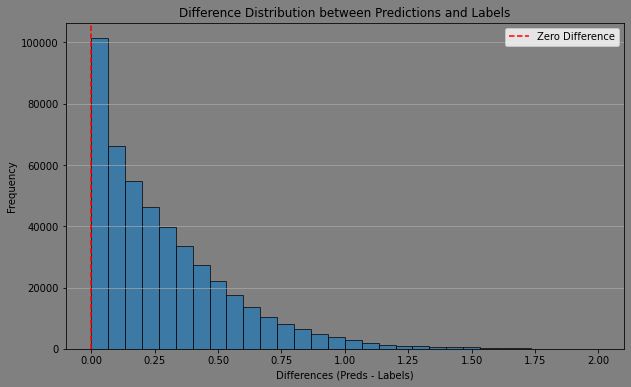

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# # Example data (replace these with your actual preds and labels)
# mask = data["catboost"]["mode"].astype(bool)
# preds = data["catboost"]["oof_preds"]
# labels = data["catboost"]["oof_labels"]

# Calculate the differences
rmse

# Plotting the differences distribution
plt.figure(figsize=(10, 6), facecolor='gray')
plt.gca().set_facecolor('gray')

plt.hist(rmse, bins=30, edgecolor='k', alpha=0.7)
plt.title('Difference Distribution between Predictions and Labels')
plt.xlabel('Differences (Preds - Labels)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # Optional: Add grid for better readability
plt.axvline(0, color='red', linestyle='--', label='Zero Difference')  # Optional: Vertical line at zero difference
plt.legend()

# Show the plot
plt.show()


In [9]:
from sklearn.metrics import mean_squared_error

# mean_squared_error(labels[mask], preds[mask], squared=False)

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(labels[~mask], preds[~mask], squared=False)

0.3941077414655988

In [21]:
mean_squared_error(labels, preds, squared=False)

0.39343323008920394

In [24]:
mask = checkpoint["catboost"]["mode"].astype(bool)

In [56]:
preds_unmasked

array([ 0.52135337,  0.51357715,  0.38240894, ..., -0.57246822,
       -0.1944617 , -0.30426898])

In [9]:
checkpoint = data

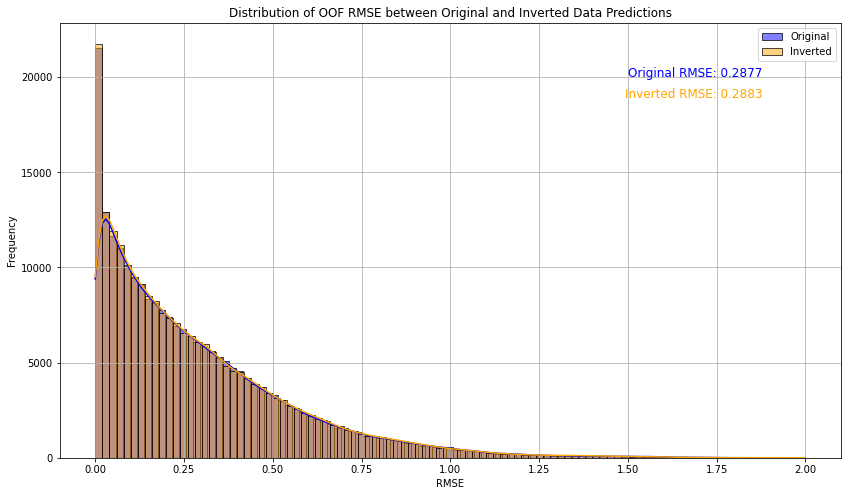

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'checkpoint' is defined previously
mask = checkpoint["catboost"]["mode"].astype(bool)
preds = checkpoint["catboost"]["oof_preds"]
labels = checkpoint["catboost"]["oof_labels"]

# Compute RMSE for each pair of columns
rmse = np.sqrt((preds - labels) ** 2)

# Filter masked and unmasked data
rmse_masked = rmse[mask]
rmse_unmasked = rmse[~mask]

# Calculate mean RMSE
overall_rmse_masked = rmse_masked.mean()
overall_rmse_unmasked = rmse_unmasked.mean()

# Create the distribution plot
plt.figure(figsize=(14, 8))

# Distribution for masked samples
sns.histplot(rmse_masked, bins=100, kde=True, color='blue', label='Original')

# Distribution for unmasked samples
sns.histplot(rmse_unmasked, bins=100, kde=True, color='orange', label='Inverted')

plt.title('Distribution of OOF RMSE between Original and Inverted Data Predictions')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Display overall RMSE values on the plot
plt.text(0.9, 0.9, f'Original RMSE: {overall_rmse_masked:.4f}', 
         transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='blue')
plt.text(0.9, 0.85, f'Inverted RMSE: {overall_rmse_unmasked:.4f}', 
         transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right', fontsize=12, color='orange')

plt.show()

In [7]:
(rmse < 0.01).sum()

135638

In [89]:
with open('rmse_mask.pickle', 'wb') as file:
    pickle.dump(rmse, file)

In [88]:
len(rmse)

233234

In [84]:
rmse = (preds_unmasked * -1 - preds_masked) ** 2

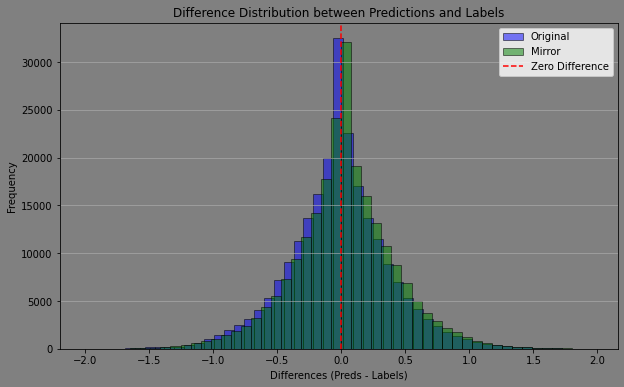

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace these with your actual preds and labels)
mask = checkpoint["catboost"]["mode"].astype(bool)
preds = checkpoint["catboost"]["oof_preds"]
labels = checkpoint["catboost"]["oof_labels"]

# Calculate the differences for both masked and non-masked cases
differences_masked = preds[mask] - labels[mask]
differences_unmasked = preds[~mask] - labels[~mask]

# Plotting the differences distributions
plt.figure(figsize=(10, 6), facecolor='gray')
plt.gca().set_facecolor('gray')

# Histogram for masked differences
plt.hist(differences_masked, bins=50, edgecolor='k', alpha=0.5, label='Original', color='blue')

# Histogram for unmasked differences
plt.hist(differences_unmasked, bins=50, edgecolor='k', alpha=0.5, label='Mirror', color='green')

# Adding labels and title
plt.title('Difference Distribution between Predictions and Labels')
plt.xlabel('Differences (Preds - Labels)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # Optional: Add grid for better readability

# Optional: Vertical line at zero difference
plt.axvline(0, color='red', linestyle='--', label='Zero Difference')

# Show legend
plt.legend()

# Show the plot
plt.show()

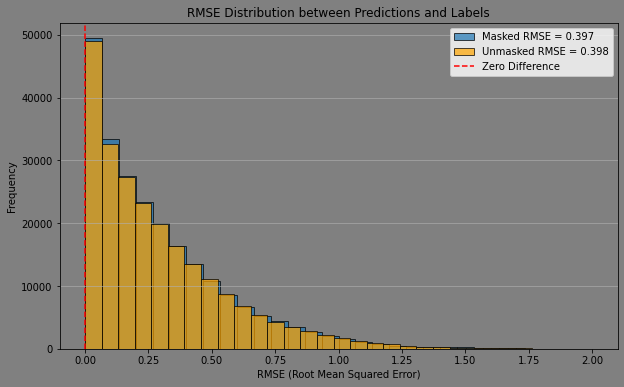

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace these with your actual preds and labels)
mask = checkpoint["catboost"]["mode"].astype(bool)
preds_masked = checkpoint["catboost"]["oof_preds"][mask]
labels_masked = checkpoint["catboost"]["oof_labels"][mask]

# Opposite of the mask
preds_unmasked = checkpoint["catboost"]["oof_preds"][~mask]
labels_unmasked = checkpoint["catboost"]["oof_labels"][~mask]

# Calculate RMSE for masked and unmasked sets
rmse_masked = np.sqrt(np.mean((preds_masked - labels_masked) ** 2, axis=0))
rmse_unmasked = np.sqrt(np.mean((preds_unmasked - labels_unmasked) ** 2, axis=0))

# Create an array of RMSE values for both sets
rmse_differences_masked = (preds_masked - labels_masked) ** 2
rmse_differences_unmasked = (preds_unmasked - labels_unmasked) ** 2

# Plotting the RMSE distributions for both sets
plt.figure(figsize=(10, 6), facecolor='gray')
plt.gca().set_facecolor('gray')

# Plot RMSE distribution for masked data
plt.hist(np.sqrt(rmse_differences_masked), bins=30, edgecolor='k', alpha=0.7, label=f'Masked RMSE = {rmse_masked:.3f}')

# Plot RMSE distribution for unmasked data
plt.hist(np.sqrt(rmse_differences_unmasked), bins=30, edgecolor='k', alpha=0.7, label=f'Unmasked RMSE = {rmse_unmasked:.3f}', color='orange')

plt.title('RMSE Distribution between Predictions and Labels')
plt.xlabel('RMSE (Root Mean Squared Error)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # Optional: Add grid for better readability
plt.axvline(0, color='red', linestyle='--', label='Zero Difference')  # Optional: Vertical line at zero difference
plt.legend()

# Show the plot
plt.show()

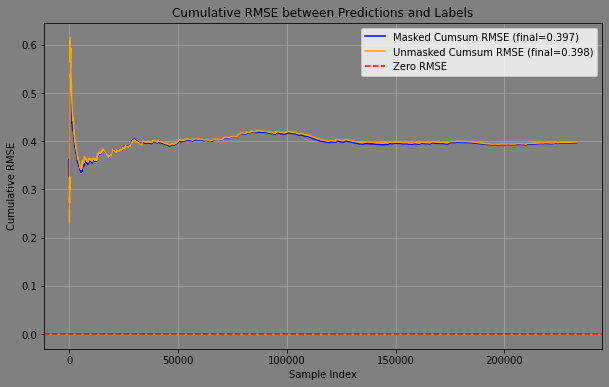

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace these with your actual preds and labels)
mask = checkpoint["catboost"]["mode"].astype(bool)
preds_masked = checkpoint["catboost"]["oof_preds"][mask]
labels_masked = checkpoint["catboost"]["oof_labels"][mask]

# Opposite of the mask
preds_unmasked = checkpoint["catboost"]["oof_preds"][~mask]
labels_unmasked = checkpoint["catboost"]["oof_labels"][~mask]

# Calculate squared errors for masked and unmasked sets
squared_errors_masked = (preds_masked - labels_masked) ** 2
squared_errors_unmasked = (preds_unmasked - labels_unmasked) ** 2

# Calculate cumulative RMSE for both sets
cumsum_rmse_masked = np.sqrt(np.cumsum(squared_errors_masked) / np.arange(1, len(squared_errors_masked) + 1))
cumsum_rmse_unmasked = np.sqrt(np.cumsum(squared_errors_unmasked) / np.arange(1, len(squared_errors_unmasked) + 1))

# Plotting the cumulative RMSE
plt.figure(figsize=(10, 6), facecolor='gray')
plt.gca().set_facecolor('gray')

# Plot cumulative RMSE for masked data
plt.plot(cumsum_rmse_masked, label=f'Masked Cumsum RMSE (final={cumsum_rmse_masked[-1]:.3f})', color='blue')

# Plot cumulative RMSE for unmasked data
plt.plot(cumsum_rmse_unmasked, label=f'Unmasked Cumsum RMSE (final={cumsum_rmse_unmasked[-1]:.3f})', color='orange')

plt.title('Cumulative RMSE between Predictions and Labels')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative RMSE')
plt.grid(True, alpha=0.75)  # Optional: Add grid for better readability
plt.axhline(0, color='red', linestyle='--', label='Zero RMSE')  # Optional: Horizontal line at zero RMSE
plt.legend()

# Show the plot
plt.show()

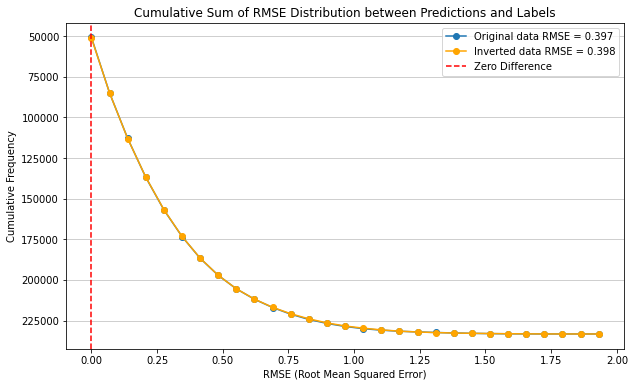

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace these with your actual preds and labels)
mask = checkpoint["catboost"]["mode"].astype(bool)
preds_masked = checkpoint["catboost"]["oof_preds"][mask]
labels_masked = checkpoint["catboost"]["oof_labels"][mask]

# Opposite of the mask
preds_unmasked = checkpoint["catboost"]["oof_preds"][~mask]
labels_unmasked = checkpoint["catboost"]["oof_labels"][~mask]

# Calculate RMSE differences for masked and unmasked sets
rmse_differences_masked = (preds_masked - labels_masked) ** 2
rmse_differences_unmasked = (preds_unmasked - labels_unmasked) ** 2

# Calculate the RMSE for masked and unmasked sets
rmse_masked = np.sqrt(np.mean(rmse_differences_masked))
rmse_unmasked = np.sqrt(np.mean(rmse_differences_unmasked))

# Define bins for RMSE distributions
bins = np.linspace(0, max(np.sqrt(rmse_differences_masked).max(), np.sqrt(rmse_differences_unmasked).max()), 30)

# Calculate cumulative sum of the histograms for masked data
hist_masked, bin_edges = np.histogram(np.sqrt(rmse_differences_masked), bins=bins)
cumsum_masked = np.cumsum(hist_masked)

# Calculate cumulative sum of the histograms for unmasked data
hist_unmasked, _ = np.histogram(np.sqrt(rmse_differences_unmasked), bins=bins)
cumsum_unmasked = np.cumsum(hist_unmasked)

# Plotting the cumulative sum RMSE distributions for both sets
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('white')  # Set plot background to white

# Plot cumsum RMSE for masked data
plt.plot(bin_edges[:-1], cumsum_masked, label=f'Original data RMSE = {rmse_masked:.3f}', marker='o')

# Plot cumsum RMSE for unmasked data
plt.plot(bin_edges[:-1], cumsum_unmasked, label=f'Inverted data RMSE = {rmse_unmasked:.3f}', marker='o', color='orange')

# Customize plot
plt.title('Cumulative Sum of RMSE Distribution between Predictions and Labels')
plt.xlabel('RMSE (Root Mean Squared Error)')
plt.ylabel('Cumulative Frequency')
plt.gca().invert_yaxis()  # Invert Y-axis
plt.grid(axis='y', alpha=0.75)  # Optional: Add grid for better readability
plt.axvline(0, color='red', linestyle='--', label='Zero Difference')  # Optional: Vertical line at zero difference
plt.legend()

# Show the plot
plt.show()

In [1]:
import pandas as pd

dfc = pd.read_csv('dataset/concepts.csv')

dfc.head()

,Id,Name,Description,TypeId,DataTypeId,ComputationTypeId,TaxonomyString,LeafNode,ShowOnWebsite
0,1,Properties,General properties of the game.,1,1,1,1,0,0
1,2,Format,Format of the game.,1,1,1,1.1,0,0
2,3,Time,Time model.,1,1,1,1.1.1,0,0
3,4,Discrete,Players move at discrete intervals.,1,1,1,1.1.1.1,1,1
4,5,Realtime,Moves not discrete.,1,1,1,1.1.1.2,1,1


In [2]:
dfc = dfc[dfc["ComputationTypeId"] == 2]

In [7]:
pd.set_option('display.max_rows', 500)

In [8]:
dfc.sort_values(by="Name")

,Id,Name,Description,TypeId,DataTypeId,ComputationTypeId,TaxonomyString,LeafNode,ShowOnWebsite
159,160,AddDecisionFrequency,Frequency of Add Decision move.,5,4,2,3.3.1.1.2.1.1,1,1
240,241,AddEffectFrequency,Frequency of Add Effect.,5,4,2,3.3.1.2.1.8.1,1,1
540,541,AdvantageP1,Percentage of games where player 1 won.,7,4,2,4.5.1,1,1
541,542,Balance,Similarity between player win rates.,7,4,2,4.5.2,1,1
523,524,Behaviour,Behaviour.,7,1,2,4,0,0
146,147,BetDecisionFrequency,Frequency of Bet Decision move.,5,4,2,3.3.1.1.1.1.1,1,1
226,227,BetEffectFrequency,Frequency of Bet Effect.,5,1,2,3.3.1.2.1.1.1,1,1
535,536,BoardCoverage,Board Coverage.,7,1,2,4.4,0,1
536,537,BoardCoverageDefault,Percentage of default board sites which a piec...,7,4,2,4.4.1,1,1
537,538,BoardCoverageFull,Percentage of all board sites which a piece wa...,7,4,2,4.4.2,1,1


In [ ]:
# class QWKObjective(object):

#     def __init__(self, num_classes):
#         self.num_classes = 68

#     def calc_ders_range(self, approxes, targets, weights):
#         a = 1
#         b = 1
#         labels = np.array(targets) + a
#         preds = np.array(approxes) + a
#         preds = preds.clip(1, self.num_classes)
#         f = 1/2 * np.sum((preds - labels)**2)
#         g = 1/2 * np.sum((preds - a)**2 + b)
#         df = preds - labels
#         dg = preds - a
#         grad = (df / g - f * dg / g**2) * len(labels)
#         hess = (1 / g - (2 * df * dg) / (g**2) + (2 * f * dg**2) / (g**3)) * len(labels)
#         return list(zip(grad, hess))


In [ ]:
        # def transform_value(x):
        #     if x == -1:
        #         return -1
        #     elif x > -1 and x < 0:
        #         return -0.5
        #     elif x == 0:
        #         return 0
        #     elif x > 0 and x < 1:
        #         return 0.5
        #     elif x == 1:
        #         return 1
        #     return x

In [ ]:
# df["utility_agent1"] = df["utility_agent1"].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
# # --- Imports ---

# import re
# import os
# import gc
# import dill
# import random
# import pickle

# import numpy as np
# import polars as pl
# import pandas as pd
# from tqdm import tqdm

# import lightgbm as lgb
# from catboost import CatBoostRegressor, CatBoostClassifier

# from sklearn.metrics import mean_squared_error
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import StratifiedGroupKFold, StratifiedKFold

# from typing import Tuple, Union

# import sys
# sys.path.append('/home/toefl/K/MCTS/dataset/')
# sys.path.append('/kaggle/input/openfe-modified')

# from openfe import transform
# import kaggle_evaluation.mcts_inference_server

# import warnings
# warnings.filterwarnings('ignore')


# # --- Run mode ---

# IS_TRAIN = True
# LOCAL = True
# IS_RERUN = False


# # --- Config ---

# class Config:
#     """Config."""
    
#     # Seed
    
#     seed = 0xFACED
    
#     # Mode (Train / Inference)
    
#     is_train = IS_TRAIN
    
#     # Paths
    
#     path_to_train_dataset = '/home/toefl/K/MCTS/dataset/train.csv' if LOCAL else '/kaggle/input/um-game-playing-strength-of-mcts-variants/train.csv' 
#     path_to_save_data_checkpoint = 'checkpoints/data_checkpoint.pickle'     # Drop columns, categorical columns, etc.
#     path_to_save_solver_checkpoint = 'checkpoints/solver_checkpoint_stratify.pickle' # Models, weights, etc.

#     path_to_load_features = 'feature.pickle' if LOCAL else '/kaggle/input/mcts-solution-checkpoint/feature.pickle'
#     path_to_tfidf = '/home/toefl/K/MCTS/dataset/tf_idf' if LOCAL else '/kaggle/input/mcts-solution-checkpoint/tf_idf'
#     path_to_load_data_checkpoint = 'checkpoints/data_checkpoint.pickle' if LOCAL else '/kaggle/input/mcts-solution-checkpoint/data_checkpoint.pickle'

#     path_to_load_solver_checkpoint = {
#         "num_games": 'checkpoints/solver_checkpoint_numgames.pickle' if LOCAL else '/kaggle/input/mcts-solution-checkpoint/solver_checkpoint_numgames.pickle', 
#         "main": 'checkpoints/solver_checkpoint.pickle' if LOCAL else '/kaggle/input/mcts-solution-checkpoint/solver_checkpoint.pickle',
#         "draw": 'checkpoints/solver_checkpoint_draw.pickle' if LOCAL else '/kaggle/input/mcts-solution-checkpoint/solver_checkpoint_draw.pickle'
#     }
    
#     # Training

#     task = "regression"
    
#     n_splits = 5

#     n_openfe_features = (0, 500)    # (All, numerical)
#     n_tf_ids_features = 0
    
#     catboost_params = {
#         'iterations': 30000,
#         'learning_rate': 0.01,
#         'depth': 10,
#         'early_stopping_rounds': 200,
        
#         'loss_function': 'RMSE',
#         'eval_metric': 'RMSE',

#         'task_type': 'GPU',
#         'verbose': 1000,
#         'thread_count': 14,
        
#         'use_best_model': True,
#         'random_seed': 0xFACED,
#     }
    
#     lgbm_params = {
#         'objective': 'regression',
#         'min_child_samples': 24,
#         'num_iterations': 30000,
#         'learning_rate': 0.01,
#         'extra_trees': True,
#         'reg_lambda': 0.8,
#         'reg_alpha': 0.1,
#         'num_leaves': 64,
#         'metric': 'rmse',
#         'device': 'cpu',
#         'max_depth': 9,
#         'max_bin': 128,
#         'verbose': -1,
#         'seed': 42
#     }
    
#     to_train = {
#         "catboost": True,
#         "lgbm": False,
#     }
    
#     weights = {
#         "catboost": 1,
#         "lgbm": 0,
#     }


# # --- Utils ---

# def set_seed(SEED):
#     """Set random seeds."""
#     random.seed(SEED)
#     os.environ['PYTHONHASHSEED'] = str(SEED)
#     np.random.seed(SEED)


# # --- Data pipeline ---

# class Dataset:
#     """The data pipeline."""
    
#     def __init__(self, config: Config, rerun: bool) -> None:
#         """Initialization."""
#         self.config = config
#         self.rerun = rerun
        
#         if self.config.is_train:
#             self.data_checkpoint = {
#                 "dropcols": [],
#                 "catcols": [],
#             }
#         else:
#             with open(config.path_to_load_data_checkpoint, "rb") as f:
#                 self.data_checkpoint = pickle.load(f)
        
#     def preprocessing(self, df: pl.DataFrame) -> pl.DataFrame:
#         """The basic preprocessing."""

#         # Initial data shape.
        
#         print("Initial shape", df.shape)

#         # df = df.with_columns((1 - pl.col("AdvantageP1")).alias("AdvantageP1"))
        
#         # Mirror the dataset.
        
#         if self.config.is_train:
#             with open('checkpoints/rmse_mask.pickle', 'rb') as file:
#                 rmse_mask = pickle.load(file)

#             df = df.with_columns(pl.Series('mask', (rmse_mask < 0.01)))

#             df = df.with_columns(pl.lit("original").alias("data_mode"))

#             df_mirror = df.clone()

#             df_mirror = df_mirror.with_columns(
#                 pl.col("agent1").alias("agent2"),
#                 pl.col("agent2").alias("agent1"),
#                 (pl.col("utility_agent1") * -1).alias("utility_agent1"),
#                 (1 - pl.col("AdvantageP1")).alias("AdvantageP1"),
#                 (1 - pl.col("Balance")).alias("Balance"),
#                 pl.lit("mirror").alias("data_mode")
#             )

#             df = pl.concat([df, df_mirror])
        
#             print("Shape after data generation", df.shape)
        
#         # Drop constant columns.
        
#         if self.config.is_train:
#             constant_columns = np.array(df.columns)[df.select(pl.all().n_unique() == 1).to_numpy().ravel()]
#             drop_columns = list(constant_columns) + ['Id']
#             self.data_checkpoint["dropcols"] += drop_columns
#         else:
#             drop_columns = self.data_checkpoint["dropcols"]
            
#         df = df.drop(drop_columns)
        
#         print('Shape after dropping constant columns:', df.shape)
        
#         # Basic information.
        
#         print('There are', df.null_count().to_numpy().sum(), 'missing values.')
#         print('There are', df.select(pl.all().n_unique() == 2).to_numpy().sum(), 'binary columns.')
        
#         return df
        
#     def feature_generation(self, df: pl.DataFrame) -> pl.DataFrame:
#         """Generate the new features."""
        
#         # Split the agent string.

#         df = df.with_columns(
#             pl.col('agent1').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 1).alias('src_p1_selection'),
#             pl.col('agent1').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 2).alias('src_p1_exploration'),
#             pl.col('agent1').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 3).alias('src_p1_playout'),
#             pl.col('agent1').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 4).alias('src_p1_bounds'),
#             pl.col('agent2').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 1).alias('src_p2_selection'),
#             pl.col('agent2').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 2).alias('src_p2_exploration'),
#             pl.col('agent2').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 3).alias('src_p2_playout'),
#             pl.col('agent2').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 4).alias('src_p2_bounds'),

#             pl.col('agent2').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 1).alias('tta_p1_selection'),
#             pl.col('agent2').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 2).alias('tta_p1_exploration'),
#             pl.col('agent2').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 3).alias('tta_p1_playout'),
#             pl.col('agent2').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 4).alias('tta_p1_bounds'),
#             pl.col('agent1').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 1).alias('tta_p2_selection'),
#             pl.col('agent1').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 2).alias('tta_p2_exploration'),
#             pl.col('agent1').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 3).alias('tta_p2_playout'),
#             pl.col('agent1').str.extract(r'MCTS-(.*)-(.*)-(.*)-(.*)', 4).alias('tta_p2_bounds')
#         )

#         # TTA fundament.

#         df = df.with_columns(
#             pl.col('agent1').alias('src_p1_agent'),
#             pl.col('agent2').alias('src_p2_agent'),
#             pl.col('agent1').alias('tta_p2_agent'),
#             pl.col('agent2').alias('tta_p1_agent'),
#             pl.col('AdvantageP1').alias('src_AdvantageP1'),
#             (1 - pl.col('AdvantageP1')).alias('tta_AdvantageP1'),
#         )

#         df = df.drop(['AdvantageP1'], strict=False)

#         # Feature engineering.

#         df = df.with_columns([
#             (pl.col('PlayoutsPerSecond') / (pl.col('MovesPerSecond') + 1e-15)).alias('Playouts/Moves'),
#             (pl.col('MovesPerSecond') / (pl.col('PlayoutsPerSecond') + 1e-15)).alias('EfficiencyPerPlayout'),
#             (pl.col('DurationActions') / (pl.col('DurationTurnsStdDev') + 1e-15)).alias('TurnsDurationEfficiency'),
#             (pl.col('DurationActions') / (pl.col('MovesPerSecond') + 1e-15)).alias('ActionTimeEfficiency'),
#             (pl.col('DurationTurnsStdDev') / (pl.col('DurationActions') + 1e-15)).alias('StandardizedTurnsEfficiency'),
#             (pl.col('DurationActions') / (pl.col('StateTreeComplexity') + 1e-15)).alias('DurationToComplexityRatio'),
#             (pl.col('GameTreeComplexity') / (pl.col('StateTreeComplexity') + 1e-15)).alias('NormalizedGameTreeComplexity'),
#             (pl.col('Balance') * pl.col('GameTreeComplexity')).alias('ComplexityBalanceInteraction'),
#             (pl.col('StateTreeComplexity') + pl.col('GameTreeComplexity')).alias('OverallComplexity'),
#             (pl.col('GameTreeComplexity') / (pl.col('PlayoutsPerSecond') + 1e-15)).alias('ComplexityPerPlayout'),
#             (pl.col('DurationTurnsNotTimeouts') / (pl.col('MovesPerSecond') + 1e-15)).alias('TurnsNotTimeouts/Moves'),
#             (pl.col('Timeouts') / (pl.col('DurationActions') + 1e-15)).alias('Timeouts/DurationActions'),
#             (pl.col('StepDecisionToEnemy') + pl.col('SlideDecisionToEnemy') + pl.col('HopDecisionMoreThanOne')).alias('ComplexDecisionRatio'),
#             (pl.col('StepDecisionToEnemy') + 
#              pl.col('HopDecisionEnemyToEnemy') + 
#              pl.col('HopDecisionFriendToEnemy') + 
#              pl.col('SlideDecisionToEnemy')).alias('AggressiveActionsRatio'),

#             (pl.col('src_AdvantageP1') / (pl.col('Balance') + 1e-15)).alias('src_AdvantageBalanceRatio'),
#             (pl.col('src_AdvantageP1') / (pl.col('DurationActions') + 1e-15)).alias('src_AdvantageTimeImpact'),
#             (pl.col('OutcomeUniformity') / (pl.col('src_AdvantageP1') + 1e-15)).alias('src_OutcomeUniformity/AdvantageP1'),

#             (pl.col('tta_AdvantageP1') / (pl.col('Balance') + 1e-15)).alias('tta_AdvantageBalanceRatio'),
#             (pl.col('tta_AdvantageP1') / (pl.col('DurationActions') + 1e-15)).alias('tta_AdvantageTimeImpact'),
#             (pl.col('OutcomeUniformity') / (pl.col('tta_AdvantageP1') + 1e-15)).alias('tta_OutcomeUniformity/AdvantageP1'),
#         ])
        
#         df = df.to_pandas()

#         # Cross-features.

#         cols = ["agent", "selection", "exploration", "playout", "bounds"]
#         for c1 in cols:
#             for c2 in cols:
#                 df[f"src_{c1}_{c2}"] = df[f"src_p1_{c1}"].astype(str) + df[f"src_p1_{c2}"].astype(str)
#                 df[f"tta_{c1}_{c2}"] = df[f"tta_p1_{c1}"].astype(str) + df[f"tta_p1_{c2}"].astype(str)

#         df = pl.from_pandas(df)

#         print("Shape after feature generation", df.shape)

#         return df
    
#     def build_validation_and_cv_features(self, df: pl.DataFrame) -> pl.DataFrame:
#         """Build the validation and CV features."""
        
#         if self.config.is_train:

#             # Build the validation based on the original data and then assign the same folds to the mirror data to avoid the leak.

#             src_df = df.clone()
            
#             df = df.filter(pl.col('data_mode') == 'original')
            
#             df = df.with_columns(pl.lit(0).alias("fold"))
#             df = df.with_row_index('index')

#             cv = StratifiedKFold(n_splits=self.config.n_splits, shuffle=True, random_state=self.config.seed)

#             for fold, (_, index) in enumerate(cv.split(
#                     df,
#                     df["utility_agent1"].alias("utility_agent1").cast(pl.Utf8) + "_" + df["agent1"],
#                     # df["GameRulesetName"]
#                 )):
#                 df = df.with_columns(
#                     pl.when(pl.col('index').is_in(index))
#                     .then(pl.lit(fold))
#                     .otherwise(pl.col('fold'))
#                     .alias('fold')
#                 )

#             src_df = src_df.with_columns(pl.Series("fold", np.concatenate((df["fold"].to_numpy(), df["fold"].to_numpy()))))

#             src_df = src_df.drop(['index', 'agent1', 'agent2'], strict=False)

#             # Filter by RMSE mask.

#             # src_df = src_df.filter((pl.col('mask') == True) | (pl.col('data_mode') == "original")) 
#             src_df = src_df.drop(['mask'], strict=False)
#             print("Data shape after filtering by mask", src_df.shape)

#             # Drop duplicates.

#             columns_for_duplicates = [column for column in src_df.columns if column != "data_mode"]
#             src_df = src_df.unique(subset=columns_for_duplicates)
#             print("Data shape after dropping duplicates", src_df.shape)

#             return src_df
        
#         else:
#             df = df.drop(['index', 'agent1', 'agent2'], strict=False)

#             return df
    
    
#     def drop_columns(self, df: pl.DataFrame) -> pl.DataFrame:
#         """Drop the certain columns."""

#         columns_to_drop = [
#         #    'GameRulesetName',
#         ]
        
#         if self.config.is_train:
#             columns_to_drop += [
#                 'num_wins_agent1',
#                 'num_draws_agent1',
#                 'num_losses_agent1',
#             ]
        
#         df = df.drop(columns_to_drop, strict=False)
        
#         print('Shape after dropping specific columns:', df.shape)
        
#         if self.config.is_train:
#             print('\n', df["fold"].value_counts())
        
#         return df
    
#     def postprocessing(self, df: pl.DataFrame) -> pd.DataFrame:
#         """Adjust data types."""
        
#         df = df.to_pandas()
        
#         if self.config.is_train:
#             cat_mapping = {feature: pd.CategoricalDtype(categories=list(set(df[feature]))) for feature in df.columns[df.dtypes == object]}
#             catcols = list(cat_mapping.keys())
#             catcols = [column for column in catcols if 'tta' not in column]
#             self.data_checkpoint["catcols"] += catcols

#         if self.config.task == "classification":
#             df["utility_agent1"] = df["utility_agent1"].astype(str)
        
#         return df
    
#     def save_data_checkpoint(self) -> None:
#         """Save data checkpoint."""
        
#         if self.config.is_train:
#             with open(self.config.path_to_save_data_checkpoint, "wb") as f:
#                 pickle.dump(self.data_checkpoint, f)
        
    
#     def get_dataset(self, df: pl.DataFrame) -> Tuple[pd.DataFrame, list]:
#         """Get the dataset."""
        
#         df = self.preprocessing(df)
#         df = self.feature_generation(df)
#         df = self.build_validation_and_cv_features(df)
#         df = self.drop_columns(df)
#         df = self.postprocessing(df)
#         self.save_data_checkpoint()
        
#         return df, self.data_checkpoint
    

# # --- Solver ---

# class Solver:
#     """Solution."""

#     def __init__(self, config: Config, rerun: bool) -> None:
#         """Initialiaztion."""
        
#         self.config = config
#         self.rerun = rerun
        
#         try:
#             with open(config.path_to_load_solver_checkpoint["main"], "rb") as f:
#                 self.models = pickle.load(f)
#         except FileNotFoundError:
#             self.models = {}

#     def generate_TF_IDF(self, df, mode, fold, n_tf_ids_features):
#         """Generate TF-IDF features."""

#         def pickle_dump(obj, path):
#             with open(path, mode="wb") as f:
#                 dill.dump(obj, f, protocol=4)
                
#         def pickle_load(path):
#             with open(path, mode="rb") as f:
#                 data = dill.load(f)
#                 return data

#         str_cols = ['EnglishRules', 'LudRules']

#         if mode == 'train': self.models["tfidf_paths"] = []

#         for col in str_cols:
#             df[f'{col}_len'] = df[col].apply(len)

#             if mode == 'train':
#                 tfidf = TfidfVectorizer(max_features=n_tf_ids_features, ngram_range=(2, 3))
#                 tfidf_feats = tfidf.fit_transform(df[col]).toarray()
#                 for i in range(tfidf_feats.shape[1]):
#                     df[f"{col}_tfidf_{i}"] = tfidf_feats[:, i]
#                 pickle_dump(tfidf, os.path.join(self.config.path_to_tfidf, f'tfidf_{fold}_{col}.model'))
#                 self.models["tfidf_paths"].append(os.path.join(self.config.path_to_tfidf, f'tfidf_{fold}_{col}.model'))

#             else:
#                 for i in range(len(self.models["tfidf_paths"])):
#                     if f'tfidf_{fold}_{col}.model' == self.models["tfidf_paths"][i].split('/')[-1]:
#                         tfidf = pickle_load(os.path.join(self.config.path_to_tfidf, f'tfidf_{fold}_{col}.model'))
#                         tfidf_feats = tfidf.transform(df[col]).toarray()
#                         for j in range(tfidf_feats.shape[1]):
#                             df[f"{col}_tfidf_{j}"] = tfidf_feats[:, j]

#         df = df.drop(str_cols, axis=1)
#         return df
    
#     def train_one_model(self, df, X, Y, catcols, model_name) -> Tuple[np.array, np.array, Union[pl.DataFrame, None]]:
#         """Train N folds of a certain model."""
        
#         # Initialize.
        
#         if model_name not in self.models:
#             self.models[model_name] = {
#                 "features": None,
#                 "oof_score": None,
#                 "models": [],
#             }
            
#         if len(self.models[model_name]["models"]) != self.config.n_splits:
#             self.models[model_name]["models"] = [None] * self.config.n_splits
        
#         # Define the instances for the metrics.

#         scores = []
#         oof_preds, oof_labels, oof_mask = np.zeros([len(df)]), np.zeros([len(df)]), np.zeros([len(df)])

#         if model_name == "catboost":
#             feature_importances = None

#         for fold in range(self.config.n_splits):    
            
#             # Get the fold's data.
            
#             print(f"\n{model_name} | Fold {fold}")
            
#             train_index = df[df["fold"] != fold].index
#             valid_index = df[df["fold"] == fold].index

#             X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
#             Y_train, Y_valid = Y.iloc[train_index], Y.iloc[valid_index]

#             print("X-train and X-valid shapes", X_train.shape, X_valid.shape)

#             # Feature encoding

#             features_to_encode = [
#                 'GameRulesetName',
#             ]

#             print("Feature encoding")
#             for feature in tqdm(features_to_encode):

#                 # Original
#                 m = {}
#                 for u in X_train[feature].unique():
#                     m[u] = Y_train[X_train[feature] == u].mean()
#                 X_train[feature] = X_train[feature].map(m)
#                 X_valid[feature] = X_valid[feature].map(m)

#                 # TTA
#                 m = {}
#                 feature = feature.replace('src', 'tta')
#                 for u in X_train[feature].unique():
#                     m[u] = Y_train[X_train[feature] == u].mean()
#                 X_valid[feature] = X_valid[feature].map(m)

#             print("Shape after feature encoding", X_train.shape)

#             # TF-IDF.

#             if self.config.n_tf_ids_features != 0:
#                 X_train = self.generate_TF_IDF(X_train, mode='train', fold=fold, n_tf_ids_features=self.config.n_tf_ids_features)
#                 X_valid = self.generate_TF_IDF(X_valid, mode='test', fold=fold, n_tf_ids_features=self.config.n_tf_ids_features)
#                 print('Shape with TF-IDF features', X_train.shape, X_valid.shape)
#             else:
#                 X_train = X_train.drop(['EnglishRules', 'LudRules'], axis=1)
#                 X_valid = X_valid.drop(['EnglishRules', 'LudRules'], axis=1)

#             # TTA processing.

#             src_columns = [column for column in X_train.columns.tolist() if 'tta' not in column and column] 
#             tta_columns = [column.replace('src', 'tta') for column in src_columns]

#             X_train = X_train[src_columns]
#             X_valid_tta = X_valid[tta_columns].rename(columns={column: column.replace('tta', 'src') for column in tta_columns})
#             X_valid = X_valid[src_columns]

#             print("Shape with source features", X_train.shape, X_valid.shape)
            
#             # Apply the OpenFE features.

#             with open(self.config.path_to_load_features, 'rb') as file:
#                 ofe_features = pickle.load(file)

#                 operators = ["abs", "log", "sqrt", "square", "sigmoid", "round", "residual", "min", "max", "+", "-", "*", "/"]
                
#                 ofe_features_basic = ofe_features[:self.config.n_openfe_features[0]]
#                 ofe_features_num = [feature for feature in ofe_features[self.config.n_openfe_features[0]:] if feature.name in operators]
#                 basic_num_count = len([f for f in ofe_features_basic if f.name in operators]) 
#                 ofe_features_num = ofe_features_num[:max(self.config.n_openfe_features[1], basic_num_count) - basic_num_count]

#                 ofe_features = ofe_features_basic + ofe_features_num

#             if self.config.n_openfe_features != (0, 0):
#                 valid_features = sorted([112, 468, 386, 6, 333, 357, 353, 194, 59, 174, 191, 182, 436, 261, 328, 189, 8, 275, 279, 223, 154, 319, 221, 218, 380, 402, 276, 1, 253, 362, 294, 108, 484, 11, 200, 356, 491, 2, 248, 176, 449, 335, 310, 479, 322, 446, 198, 116, 206, 214])
#                 X_train, _ = transform(X_train, X_valid_tta[:10], ofe_features, valid_features, n_jobs=1)
#                 _, X_valid = transform(X_train[:10], X_valid, ofe_features, valid_features, n_jobs=1)
#                 _, X_valid_tta = transform(X_train[:10], X_valid_tta, ofe_features, valid_features, n_jobs=1)
                
#                 del ofe_features

#             X_train = X_train.drop([column for column in X_train.columns if 'index' in column], axis=1)
#             X_valid = X_valid.drop([column for column in X_valid.columns if 'index' in column], axis=1)
#             X_valid_tta = X_valid_tta.drop([column for column in X_valid_tta.columns if 'index' in column], axis=1)

#             X_train = X_train.fillna(-100)
#             X_valid = X_valid.fillna(-100)
#             X_valid_tta = X_valid_tta.fillna(-100)

#             print('Shape with OpenFE features', X_train.shape, X_valid.shape)

#             # Separate original and mirrored data.

#             mask = X_valid["data_mode"] == "original"
#             X_valid_src = X_valid[mask]
#             X_valid_tta = X_valid_tta[mask]
#             Y_valid_src = Y_valid[mask]

#             X_train = X_train.drop(["data_mode"], axis=1)
#             X_valid = X_valid.drop(["data_mode"], axis=1)
#             X_valid_src = X_valid_src.drop(["data_mode"], axis=1)
#             X_valid_tta = X_valid_tta.drop(["data_mode"], axis=1)

#             print('Original features shape', X_train.shape, X_valid_src.shape)

#             # Categorical mapping.

#             cat_mapping, catcols = {}, []
#             for feature in X_train.columns:
#                 if X_train[feature].dtype == object:
#                     cat_mapping[feature] = pd.CategoricalDtype(categories=list(set(X_train[feature])))
#                     catcols.append(feature)
#                 else:
#                     cat_mapping[feature] = float
    
#             X_train = X_train.astype(cat_mapping)
#             X_valid = X_valid.astype(cat_mapping)
#             X_valid_src = X_valid_src.astype(cat_mapping)
#             X_valid_tta = X_valid_tta.astype(cat_mapping)
            
#             # Create and fit the model.
            
#             if not self.rerun:
                
#                 if model_name == "catboost":
#                     if self.config.task == "classification":
#                         model = CatBoostClassifier(**self.config.catboost_params, cat_features=catcols)
#                     else:
#                         model = CatBoostRegressor(**self.config.catboost_params, cat_features=catcols)
#                     model.fit(X_train, Y_train, eval_set=(X_valid_src, Y_valid_src))
                    
#                 elif model_name == "lgbm":
#                     model = lgb.LGBMRegressor(**self.config.lgbm_params)
#                     model.fit(X_train, Y_train,
#                       eval_set=[(X_valid_src, Y_valid_src)],
#                       eval_metric='rmse',
#                       callbacks=[
#                           lgb.early_stopping(self.config.catboost_params["early_stopping_rounds"]),
#                            lgb.log_evaluation(self.config.catboost_params["verbose"])
#                       ])
#             else:
#                 model = self.models[model_name]["models"][fold]
            
#             # Prediction (with TTA).
            
#             if self.config.task == "classification":
#                 Y_valid_src = Y_valid_src.astype(np.float)
#                 preds_original = model.predict(X_valid_src).astype(float)
#                 preds_tta = model.predict(X_valid_tta).astype(float) * -1
#                 preds = (preds_original + preds_tta) / 2
#                 preds = preds[0]
#             else:
#                 preds_original = model.predict(X_valid_src)
#                 preds_tta = model.predict(X_valid_tta) * -1
#                 preds = (preds_original + preds_tta) / 2
#                 full_preds = model.predict(X_valid)
            
#             # Save the scores and the metrics.
            
#             oof_preds[valid_index] = full_preds
#             oof_labels[valid_index] = Y_valid
#             oof_mask[valid_index] = mask

#             score_original = mean_squared_error(Y_valid_src, preds_original, squared=False)
#             score_tta = mean_squared_error(Y_valid_src, preds_tta, squared=False)
#             score = mean_squared_error(Y_valid_src, preds, squared=False)

#             scores.append(score_original)

#             print(round(score_original, 4))
#             print(round(score_tta, 4))
#             print(round(score, 4))    
            
#             if not self.rerun:
#                 self.models[model_name]["models"][fold] = model
                
#             if model_name == "catboost":
#                 if feature_importances is None:
#                     feature_importances = model.get_feature_importance() / self.config.n_splits
#                 else:
#                     feature_importances += model.get_feature_importance() / self.config.n_splits
#                 fi = pl.DataFrame({
#                     "feature": X_train.columns,
#                     "importance": feature_importances
#                 }).sort(by='importance', descending=True)
#                 print(fi.head(10))
#                 fi.write_csv('dataset/feature_importance.csv')
            
#             gc.collect()
        
#         # Clip final predictions. 
        
#         oof_preds = np.clip(oof_preds, -1, 1)
        
#         # Count and display the scores.
            
#         oof_score = mean_squared_error(oof_labels, oof_preds, squared=False)
        
#         if not self.rerun:
#             self.models[model_name]["features"] = src_columns
#             self.models[model_name]["oof_score"] = oof_score

#         self.models[model_name]["oof_preds"] = oof_preds
#         self.models[model_name]["oof_labels"] = oof_labels
#         self.models[model_name]["mode"] = oof_mask
        
#         print(f'\nCV scores {model_name}')
#         for fold in range(len(scores)):
#             print(f'Fold {fold} | {round(scores[fold], 4)}')
        
#         print("AVG", round(np.mean(scores), 4))
#         print("STD", round(np.std(scores), 4))
#         print("OOF", round(oof_score, 4))
        
#         if model_name == "catboost":
#             feature_importances = pd.DataFrame({
#                 "feature": X_train.columns,
#                 "importance": feature_importances
#             }).sort_values(by='importance', ascending=False)
#             print(feature_importances.head(10))
#             feature_importances.to_csv('dataset/feature_importance.csv')
#         else:
#             feature_importances = None
        
#         return oof_labels, oof_preds, feature_importances
            
#     def fit(self, df: pl.DataFrame, data_checkpoint: dict, oof_features=None) -> dict:
#         """Training."""

#         # Meta features.

#         # with open(self.config.path_to_load_solver_checkpoint["num_games"], 'rb') as file:
#         #     checkpoint = pickle.load(file)
#         #     df["num_games"] = checkpoint["catboost"]["oof_preds"]
#         #     del checkpoint

#         # Inverted Advantage prediction.

#         # with open('checkpoints/oof_preds/tta_advantage.', 'rb') as f:
#         #     df["inverted_Advantage_pred"] = pickle.load(f)
        
#         # Select the feature and the targets.
        
#         X = df.drop(['utility_agent1', 'fold'], axis=1).rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)).reset_index()
#         Y = df['utility_agent1']
#         catcols = data_checkpoint["catcols"]
        
#         if oof_features is not None:
#             X["oof"] = oof_features
            
#         # Train models.
        
#         artifacts = {}
        
#         for model_name, to_train in self.config.to_train.items():
#             if to_train:
#                 artifacts[model_name] = {}

#                 oof_labels, oof_preds, feature_importance = self.train_one_model(df, X, Y, catcols, model_name)

#                 artifacts[model_name]["oof_preds"] = oof_preds
#                 artifacts[model_name]["oof_labels"] = oof_labels
#                 artifacts[model_name]["feature_importance"] = feature_importance
        
#         # Save solution checkpoint for the inference.
        
#         if self.config.is_train and not self.rerun:
#             with open(self.config.path_to_save_solver_checkpoint, "wb") as f:
#                 pickle.dump(self.models, f)
#         elif self.rerun:
#             pass
#             # with open('checkpoints/oof_preds/tta_advantage.', "wb") as f:
#             #     pickle.dump(oof_preds, f)
                
#         return artifacts
            
#     def predict(self, X: pd.DataFrame, df_train: pd.DataFrame, data_checkpoint: dict) -> np.array:
#         """Inference."""

#         # TF-IDF.

#         if self.config.n_tf_ids_features != 0:
#             X = self.generate_TF_IDF(X, mode='test', fold=0, n_tf_ids_features=self.config.n_tf_ids_features)
#             print('Shape with TF-IDF features', X.shape)
#         else:
#             X = X.drop(['EnglishRules', 'LudRules'], axis=1)

#         # TTA.
        
#         X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)).reset_index()

#         src_columns = [column for column in X.columns.tolist() if 'tta' not in column]
#         tta_columns = [column.replace('src', 'tta') for column in src_columns]

#         X_valid_src = X[src_columns]
#         X_valid_tta = X[tta_columns].rename(columns={column: column.replace('tta', 'src') for column in tta_columns})

#         # Apply OpenFE features.

#         with open(self.config.path_to_load_features, 'rb') as file:
#             ofe_features = pickle.load(file)

#             operators = ["abs", "log", "sqrt", "square", "sigmoid", "round", "residual", "min", "max", "+", "-", "*", "/"]

#             ofe_features_basic = ofe_features[:self.config.n_openfe_features[0]]
#             ofe_features_num = [feature for feature in ofe_features[self.config.n_openfe_features[0]:] if feature.name in operators]
#             basic_num_count = len([f for f in ofe_features_basic if f.name in operators]) 
#             ofe_features_num = ofe_features_num[:max(self.config.n_openfe_features[1], basic_num_count) - basic_num_count]

#             ofe_features = ofe_features_basic + ofe_features_num

#         if self.config.n_openfe_features != (0, 0):
#             valid_features = sorted([112, 468, 386, 6, 333, 357, 353, 194, 59, 174, 191, 182, 436, 261, 328, 189, 8, 275, 279, 223, 154, 319, 221, 218, 380, 402, 276, 1, 253, 362, 294, 108, 484, 11, 200, 356, 491, 2, 248, 176, 449, 335, 310, 479, 322, 446, 198, 116, 206, 214])
#             _, X_valid_src = transform(X_valid_src[:1], X_valid_src, ofe_features, valid_features, n_jobs=1)
#             _, X_valid_tta = transform(X_valid_tta[:1], X_valid_tta, ofe_features, valid_features, n_jobs=1)

#             del ofe_features
            
#         X_valid_src = X_valid_src.drop([column for column in X_valid_src.columns if 'index' in column], axis=1)
#         X_valid_tta = X_valid_tta.drop([column for column in X_valid_tta.columns if 'index' in column], axis=1)

#         X_valid_src = X_valid_src.fillna(-100)
#         X_valid_tta = X_valid_tta.fillna(-100)

#         # Categorical mapping.

#         cat_mapping = {}
#         for feature in X_valid_src.columns:
#             if X_valid_src[feature].dtype == object:
#                 cat_mapping[feature] = pd.CategoricalDtype(categories=list(set(X_valid_src[feature])))
#             else:
#                 cat_mapping[feature] = float

#         X_valid_src = X_valid_src.astype(cat_mapping)
        
#         cat_mapping = {}
#         for feature in X_valid_tta.columns:
#             if X_valid_tta[feature].dtype == object:
#                 cat_mapping[feature] = pd.CategoricalDtype(categories=list(set(X_valid_tta[feature])))
#             else:
#                 cat_mapping[feature] = float
                
#         X_valid_tta = X_valid_tta.astype(cat_mapping)

#         # Inference | NumGames MetaModel.

#         # with open(config.path_to_load_solver_checkpoint["num_games"], "rb") as f:
#         #     models = pickle.load(f)

#         # prediction = np.zeros(len(X))

#         # for fold in range(self.config.n_splits):    

#         #     model = models["catboost"]["models"][fold]
#         #     preds = model.predict(X_valid_src)

#         #     prediction += np.clip(preds, -1, 1) / self.config.n_splits

#         # X["num_games"] = prediction
#         # del models

#         # Inference | Main.

#         prediction = np.zeros(len(X))
        
#         for model_name, weight in self.config.weights.items():
            
#             if model_name not in self.models: continue
            
#             preds = np.zeros(len(X))

#             for fold in range(self.config.n_splits):    

#                 model = self.models[model_name]["models"][fold]
                    
#                 preds_original = model.predict(X_valid_src)
#                 # preds_tta = model.predict(X_valid_tta) * -1
#                 preds += (preds_original + preds_original) / 2 / self.config.n_splits

#             prediction += np.clip(preds, -1, 1) * weight
            
#         return prediction
    

# # --- Train and inference ---

# def train(rerun: bool, oof_features=None) -> dict:
#     """Training function."""
    
#     config = Config()
    
#     set_seed(config.seed)
#     dataset = Dataset(config, rerun)
#     solver = Solver(config, rerun)
    
#     df = pl.read_csv(config.path_to_train_dataset)
#     df, data_checkpoint = dataset.get_dataset(df)
#     artifacts = solver.fit(df, data_checkpoint, oof_features)
    
#     return artifacts


# if not IS_TRAIN:
    
#     config = Config()   
    
#     set_seed(config.seed)
#     dataset = Dataset(config, rerun=False)
#     solver = Solver(config, rerun=False)

#     df_train = pl.read_csv(config.path_to_train_dataset)
#     df_train, _ = dataset.get_dataset(df_train)

#     def predict(test: pl.DataFrame, sample_sub: pl.DataFrame) -> pl.DataFrame:
#         """Inference function."""
        
#         df, data_checkpoint = dataset.get_dataset(test)
#         preds = solver.predict(df, df_train, data_checkpoint)

#         # preds[df["GameTreeComplexity"] == 0] = 2 * df[df["GameTreeComplexity"] == 0]["AdvantageP1"] - 1

#         return sample_sub.with_columns(pl.Series('utility_agent1', preds))
    

# # --- Run ---

# if IS_TRAIN:
#     artifacts = train(rerun=IS_RERUN, oof_features=None)
# else:
#     inference_server = kaggle_evaluation.mcts_inference_server.MCTSInferenceServer(predict)
#     if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
#         inference_server.serve()
#     else:
#         inference_server.run_local_gateway(
#             (
#                 '/home/toefl/K/MCTS/dataset/test.csv' if LOCAL else '/kaggle/input/um-game-playing-strength-of-mcts-variants/test.csv',
#                 '/home/toefl/K/MCTS/dataset/sample_submission.csv' if LOCAL else '/kaggle/input/um-game-playing-strength-of-mcts-variants/sample_submission.csv'
#             )
#         )
#         df = pd.read_parquet('submission.parquet')
#         print(df.head())

In [ ]:
class xDeepFM(nn.Module):
    def __init__(self, 
                 field_dims, 
                 num_numerical_features,
                 embedding_dim=8, 
                 mlp_dims=[16, 16], 
                 dropout=0.2, 
                 cin_layers=[16, 16]):
        """
        xDeepFM Model Initialization

        Args:
            field_dims (list): Number of unique values in each categorical feature.
            num_numerical_features (int): Number of numerical (continuous) features.
            embedding_dim (int): Dimensionality of embedding vectors.
            mlp_dims (list): List of dimensions for MLP layers.
            dropout (float): Dropout probability for regularization in MLP.
            cin_layers (list): Number of units in each CIN layer.
        """
        super(xDeepFM, self).__init__()
        
        self.num_numerical_features = num_numerical_features
        
        # Embedding layer for categorical features
        self.embedding = nn.Embedding(sum(field_dims), embedding_dim)
        self.offsets = torch.cumsum(torch.tensor([0] + field_dims[:-1]), dim=0)

        # Linear part for both numerical and categorical features
        self.linear = nn.Linear(num_numerical_features + len(field_dims), 1)

        # Factorization Machine (FM) for 2nd-order interactions (categorical features only)
        self.fm = FactorizationMachine(reduce_sum=True)

        # Compressed Interaction Network (CIN) for high-order feature interactions
        self.cin = CompressedInteractionNetwork(
            input_dim=len(field_dims),
            embedding_dim=embedding_dim,
            layers=cin_layers
        )
        self.cin_output_dim = sum(cin_layers)

        # Deep Neural Network (MLP) for feature interaction learning
        input_dim = (len(field_dims) * embedding_dim) + num_numerical_features  # Flattened inputs
        self.mlp = nn.Sequential()
        for mlp_dim in mlp_dims:
            self.mlp.add_module("Linear", nn.Linear(input_dim, mlp_dim))
            self.mlp.add_module("ReLU", nn.ReLU())
            self.mlp.add_module("Dropout", nn.Dropout(dropout))
            input_dim = mlp_dim
        self.mlp.add_module("Output", nn.Linear(mlp_dims[-1], 1))

        # Output layer that integrates Linear, CIN, FM, and MLP parts
        self.output_layer = nn.Linear(1 + self.cin_output_dim + 1 + 1, 1)

    def forward(self, numerical_features, categorical_features):
        """
        Forward pass for xDeepFM.

        Args:
            numerical_features (torch.Tensor): Continuous numerical features (shape: [batch_size, num_numerical_features]).
            categorical_features (torch.Tensor): Categorical features (shape: [batch_size, num_fields]).
        
        Returns:
            torch.Tensor: Model predictions (shape: [batch_size, 1]).
        """
        # Adjust categorical feature indices for embedding lookup
        categorical_features = categorical_features + self.offsets.to(categorical_features.device)
        
        # Embedding lookup for categorical features
        embed_x = self.embedding(categorical_features)  # Shape: [batch_size, num_fields, embedding_dim]

        # Linear layer processes both numerical and categorical features
        linear_features = torch.cat([numerical_features, categorical_features.float()], dim=1)
        linear_out = self.linear(linear_features)  # Shape: [batch_size, 1]

        # FM for second-order interactions (categorical features only)
        fm_out = self.fm(embed_x)  # Shape: [batch_size, 1]

        # CIN for high-order interactions among categorical features
        cin_out = self.cin(embed_x)  # Shape: [batch_size, sum(cin_layers)]

        # MLP for numerical and categorical features (concatenate flattened embeddings with numerical inputs)
        mlp_x = torch.cat([embed_x.view(embed_x.size(0), -1), numerical_features], dim=1)  # Flatten categorical embeddings
        mlp_out = self.mlp(mlp_x)  # Shape: [batch_size, 1]

        # Combine outputs from Linear, FM, CIN, and MLP parts
        total_output = torch.cat([linear_out, fm_out, cin_out, mlp_out], dim=1)

        # Final prediction
        return self.output_layer(total_output)


class FactorizationMachine(nn.Module):
    """ Factorization Machine for second-order feature interactions """
    def __init__(self, reduce_sum=True):
        super(FactorizationMachine, self).__init__()
        self.reduce_sum = reduce_sum

    def forward(self, x):
        """
        FM forward pass.

        Args:
            x (torch.Tensor): Input tensor (shape: [batch_size, num_fields, embedding_dim])
        Returns:
            torch.Tensor: Second-order interaction results
        """
        square_of_sum = torch.sum(x, dim=1) ** 2  # Shape: [batch_size, embedding_dim]
        sum_of_square = torch.sum(x ** 2, dim=1)  # Shape: [batch_size, embedding_dim]
        interaction = 0.5 * (square_of_sum - sum_of_square)

        if self.reduce_sum:
            return torch.sum(interaction, dim=1, keepdim=True)  # Shape: [batch_size, 1]
        return interaction  # Shape: [batch_size, embedding_dim]


class CompressedInteractionNetwork(nn.Module):
    """ CIN for capturing high-order feature interactions """
    def __init__(self, input_dim, embedding_dim, layers=[16, 16]):
        """
        Args:
            input_dim (int): Number of fields (features).
            embedding_dim (int): Dimensionality of embedding vectors.
            layers (list): Number of units in each CIN layer.
        """
        super(CompressedInteractionNetwork, self).__init__()
        self.layers = nn.ModuleList()
        self.input_dim = input_dim

        prev_dim = input_dim * embedding_dim
        for layer_size in layers:
            self.layers.append(nn.Conv1d(in_channels=prev_dim, out_channels=layer_size, kernel_size=1))
            prev_dim = layer_size * input_dim

    def forward(self, x):
        """
        CIN forward pass.

        Args:
            x (torch.Tensor): Input tensor [batch_size, num_fields, embedding_dim]
        Returns:
            torch.Tensor: CIN outputs [batch_size, sum(layers)]
        """
        batch_size = x.size(0)
        x0 = x.unsqueeze(2)  # Shape: [batch_size, num_fields, 1, embedding_dim]
        h = x0
        cin_outputs = []

        for conv in self.layers:
            z = torch.matmul(h, x0.transpose(2, 3))  # Outer product [batch_size, num_fields, num_fields, embedding_dim]
            z = z.view(batch_size, self.input_dim, -1)  # Flatten: [batch_size, num_fields, channels]
            h = conv(z)  # Apply convolution
            cin_outputs.append(torch.sum(h, dim=2))  # Summing over channels

        # Concatenate CIN outputs
        return torch.cat(cin_outputs, dim=1)  # Shape: [batch_size, sum(layers)]

class DNN(nn.Module):

    def __init__(self, output_size=1, epochs=100, batch_size=32, learning_rate=0.001, 
                 device='cpu', early_stopping_patience=10):
        super(DNN, self).__init__()

        self.device = device
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.early_stopping_patience = early_stopping_patience

        self.output_size = output_size
        self.embeddings = None
        self.scaler = None
        self.cat_scaler = None
        self.input_size = 0
        self.cat_column_names = []

    def _build_model(self):
        self.model = nn.Sequential(
            nn.Linear(self.input_size, 1024),
            nn.BatchNorm1d(1024),
            nn.Hardswish(),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.Hardswish(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.Hardswish(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.Hardswish(),
            nn.Linear(128, self.output_size)
        ).to(self.device)
        
    def forward(self, x_num, x_cat):
        x_embed = self.embedding_layer(x_cat)  
        x_embed = x_embed.view(x_embed.size(0), -1) 
        
        x = torch.cat([x_num, x_embed], dim=1)

        return self.model(x)

    def fit(self, X_train, Y_train, X_val, Y_val):
        if isinstance(X_train, pd.DataFrame) and isinstance(X_val, pd.DataFrame):
           
            self.cat_column_names = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
            num_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()

            categorical_dims = [X_train[col].nunique() for col in self.cat_column_names]
            embedding_dim = 512

            embedding_input_dim = sum(categorical_dims)
            self.embedding_layer = nn.EmbeddingBag(embedding_input_dim, embedding_dim, mode='sum').to(self.device)

            self.input_size = embedding_dim + len(num_columns)
            self._build_model() 

            X_train_num = X_train[num_columns].values
            X_val_num = X_val[num_columns].values

            self.scaler = QuantileTransformer()
            self.scaler.fit(X_train_num)

            X_train_num_scaled = torch.tensor(self.scaler.transform(X_train_num)).float().to(self.device)
            X_val_num_scaled = torch.tensor(self.scaler.transform(X_val_num)).float().to(self.device)

            X_train_cat = X_train[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes)
            X_val_cat = X_val[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes)

            X_train_cat_tensor = torch.tensor(X_train_cat.values).long().to(self.device)
            X_val_cat_tensor = torch.tensor(X_val_cat.values).long().to(self.device)

            Y_train_tensor = torch.tensor(Y_train.values).float().to(self.device).unsqueeze(-1)
            Y_val_tensor = torch.tensor(Y_val.values).float().to(self.device).unsqueeze(-1)

            train_dataset = TensorDataset(X_train_num_scaled, X_train_cat_tensor, Y_train_tensor)
            train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

            val_dataset = TensorDataset(X_val_num_scaled, X_val_cat_tensor, Y_val_tensor)
            val_loader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False)

            criterion = lambda outputs, targets: torch.sqrt(nn.MSELoss()(outputs, targets))
            optimizer = Ranger(self.parameters(), lr=self.learning_rate)
            scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=self.epochs, eta_min=1e-8)

            # Mixed precision scaler
            scaler = GradScaler()

            best_val_loss = np.inf
            patience_counter = 0

            for epoch in range(self.epochs):
                print(f"\nEpoch {epoch + 1}/{self.epochs}")
                
                self.train()
                train_loss = 0.0
                train_batches = tqdm(train_loader, desc="Train Batches", leave=False) 

                # Training with mixed precision
                for batch_idx, (batch_X_num, batch_X_cat, batch_Y) in enumerate(train_batches):
                    batch_X_num, batch_X_cat, batch_Y = batch_X_num.to(self.device), batch_X_cat.to(self.device), batch_Y.to(self.device)
                    
                    optimizer.zero_grad()
                    
                    # Use autocast for mixed precision
                    with autocast():
                        outputs = self.forward(batch_X_num, batch_X_cat)
                        loss = criterion(outputs, batch_Y)
                    
                    # Scale the loss and backpropagate
                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()

                    train_loss += loss.item()
                    train_batches.set_postfix({'Current Train Loss': loss.item()})
                
                train_loss /= len(train_loader)
                print(f"Training Loss: {train_loss:.4f}", end=' ')
                
                self.eval()
                val_loss = 0.0
                all_preds = []
                all_labels = []
                val_batches = tqdm(val_loader, desc="Val Batches", leave=False)
                
                # Validation with mixed precision
                with torch.no_grad():
                    for batch_idx, (batch_X_num, batch_X_cat, batch_Y) in enumerate(val_batches):
                        batch_X_num, batch_X_cat, batch_Y = batch_X_num.to(self.device), batch_X_cat.to(self.device), batch_Y.to(self.device)
                        
                        with autocast():
                            outputs = self.forward(batch_X_num, batch_X_cat)
                            loss = criterion(outputs, batch_Y)
                        
                        val_loss += loss.item()
                        all_preds.append(outputs.cpu().numpy())
                        all_labels.append(batch_Y.cpu().numpy())
                        val_batches.set_postfix({'Current Val Loss': loss.item()})
                
                val_loss /= len(val_loader)
                all_preds = np.concatenate(all_preds)
                all_labels = np.concatenate(all_labels)
                val_rmse = mean_squared_error(all_labels, all_preds, squared=False)
                print(f"Validation Loss: {val_loss:.4f}, Validation RMSE: {val_rmse:.4f}")
                
                if val_rmse < best_val_loss:
                    best_val_loss = val_rmse 
                    patience_counter = 0
                    self.save('checkpoints/tmp.pt')
                else:
                    patience_counter += 1
                
                if patience_counter >= self.early_stopping_patience:
                    break
                
                scheduler.step()

        else:
            raise ValueError("X_train and X_val must be pandas DataFrames")

    def predict(self, X):
        self.eval()
        self.load('checkpoints/tmp.pt')
        with torch.no_grad():
            X_num = X.select_dtypes(exclude=['object', 'category']).values
            X_num_scaled = torch.tensor(self.scaler.transform(X_num)).float().to(self.device)

            X_cat = X[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes).values
            X_cat_tensor = torch.tensor(X_cat).long().to(self.device)

            dataset = TensorDataset(X_num_scaled, X_cat_tensor)
            data_loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)

            predictions = []
            print('Prediction')
            for X_num_batch, X_cat_batch in tqdm(data_loader):
                preds = self.forward(X_num_batch, X_cat_batch)
                predictions.append(preds.cpu().numpy())
            return np.squeeze(np.vstack(predictions))

    def save(self, file_path):
        checkpoint = {
            'model_state_dict': self.state_dict(),
            'scaler': self.scaler,
        }
        joblib.dump(checkpoint, file_path)

    def load(self, file_path):
        checkpoint = joblib.load(file_path)
        self.load_state_dict(checkpoint['model_state_dict'])
        self.scaler = checkpoint['scaler']

In [ ]:
class DNN(nn.Module):

    def __init__(self, output_size=1, epochs=100, batch_size=32, learning_rate=0.001, 
                 device='cpu', early_stopping_patience=10):
        super(DNN, self).__init__()

        self.device = device
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.early_stopping_patience = early_stopping_patience

        self.output_size = output_size
        self.embeddings = None
        self.scaler = None
        self.input_size = 0
        self.cat_column_names = []  # Store categorical column names

    def _build_model(self):
        return nn.Sequential(
            nn.Linear(self.input_size, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, self.output_size)
        ).to(self.device)
        
    def forward(self, x_num, x_cat):
        # Process through the single embedding layer
        x_embed = self.embedding_layer(x_cat)  # Apply embedding
        x_embed = x_embed.view(x_embed.size(0), -1)  # Reshape to 2D (flatten embeddings)
        
        # Concatenate numeric and embedded categorical data
        x = torch.cat([x_num, x_embed], dim=1)
        return self.model(x)

    def fit(self, X_train, Y_train, X_val, Y_val):
        if isinstance(X_train, pd.DataFrame) and isinstance(X_val, pd.DataFrame):
           # Automatically determine categorical and numeric columns
            self.cat_column_names = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
            num_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()

            # Build embedding dimensions based on categorical unique values
            categorical_dims = [X_train[col].nunique() for col in self.cat_column_names]
            embedding_dim = 10

            # Define a single embedding layer capable of handling all categorical features
            embedding_input_dim = sum(categorical_dims)  # Sum of distinct values across features
            self.embedding_layer = nn.EmbeddingBag(embedding_input_dim, embedding_dim, mode='sum').to(self.device)

            self.input_size = embedding_dim + len(num_columns)
            self.model = self._build_model()  # Build the model

            # Process numeric columns
            X_train_num = X_train[num_columns].values
            X_val_num = X_val[num_columns].values

            # Scale numeric data
            self.scaler = StandardScaler()
            self.scaler.fit(X_train_num)
            X_train_num_scaled = torch.tensor(self.scaler.transform(X_train_num)).float().to(self.device)
            X_val_num_scaled = torch.tensor(self.scaler.transform(X_val_num)).float().to(self.device)

            # Process categorical columns
            X_train_cat = X_train[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes)
            X_val_cat = X_val[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes)
            X_train_cat_tensor = torch.tensor(X_train_cat.values).long().to(self.device)
            X_val_cat_tensor = torch.tensor(X_val_cat.values).long().to(self.device)

            Y_train_tensor = torch.tensor(Y_train.values).float().to(self.device)
            Y_val_tensor = torch.tensor(Y_val.values).float().to(self.device)

            train_dataset = TensorDataset(X_train_num_scaled, X_train_cat_tensor, Y_train_tensor)
            train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

            val_dataset = TensorDataset(X_val_num_scaled, X_val_cat_tensor, Y_val_tensor)
            val_loader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False)

            criterion = lambda outputs, targets: torch.sqrt(nn.MSELoss()(outputs, targets))
            optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)
            scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=self.epochs, eta_min=1e-8)

            best_val_loss = np.inf
            patience_counter = 0

            for epoch in range(self.epochs):
                print(f"\n**Epoch {epoch + 1}/{self.epochs}**")
                
                # Training Loop
                print("Training")
                self.train()
                train_loss = 0.0
                train_batches = tqdm(train_loader, desc="Train Batches", leave=False)  # Progress per batch
                for batch_idx, (batch_X_num, batch_X_cat, batch_Y) in enumerate(train_batches):
                    optimizer.zero_grad()
                    outputs = self.forward(batch_X_num, batch_X_cat)
                    loss = criterion(outputs, batch_Y)
                    loss.backward()
                    optimizer.step()

                    train_loss += loss.item()
                    
                    # Update progress bar with current batch loss
                    train_batches.set_postfix({'Current Train Loss': loss.item()})
                
                train_loss /= len(train_loader)
                print(f"Training Loss: {train_loss:.4f}")
                
                # Validation Loop
                print("**Validation:**")
                self.eval()
                val_loss = 0.0
                all_preds = []
                all_labels = []
                val_batches = tqdm(val_loader, desc="Val Batches", leave=False)  # Progress per batch

                with torch.no_grad():
                    for batch_idx, (batch_X_num, batch_X_cat, batch_Y) in enumerate(val_batches):
                        outputs = self.forward(batch_X_num, batch_X_cat)
                        loss = criterion(outputs, batch_Y)
                        val_loss += loss.item()

                        # Collect predictions and labels for macro metrics
                        all_preds.append(outputs.cpu().numpy())
                        all_labels.append(batch_Y.cpu().numpy())
                        
                        # Update progress bar with current batch loss
                        val_batches.set_postfix({'Current Val Loss': loss.item()})
                
                val_loss /= len(val_loader)

                # Calculate RMSE (macro metric)
                all_preds = np.concatenate(all_preds)
                all_labels = np.concatenate(all_labels)
                val_rmse = mean_squared_error(all_labels, all_preds, squared=False)
                print(f"Validation Loss: {val_loss:.4f}, Validation RMSE: {val_rmse:.4f}")
                
                # Early Stopping Logic
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience_counter = 0
                    self.best_model_state = self.state_dict()
                else:
                    patience_counter += 1
                
                # Stop training if patience limit reached
                if patience_counter >= self.early_stopping_patience:
                    break
                
                # Scheduler step
                scheduler.step()
        else:
            raise ValueError("X_train and X_val must be pandas DataFrames")

    def predict(self, X):
        self.eval()
        with torch.no_grad():
            # Process numeric and categorical data
            X_num = X.select_dtypes(exclude=['object', 'category']).values
            X_num_scaled = torch.tensor(self.scaler.transform(X_num)).float().to(self.device)

            X_cat = X[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes).values
            X_cat_tensor = torch.tensor(X_cat).long().to(self.device)

            dataset = TensorDataset(X_num_scaled, X_cat_tensor)
            data_loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)

            predictions = []
            print('Prediction')
            for X_num_batch, X_cat_batch in tqdm(data_loader):
                preds = self.forward(X_num_batch, X_cat_batch)
                predictions.append(preds.cpu().numpy())
            return np.squeeze(np.vstack(predictions))

    def save(self, file_path):
        checkpoint = {
            'model_state_dict': self.state_dict(),
            'scaler': self.scaler,
            'categorical_dims': [embedding.embedding_dim for embedding in self.embeddings],
            'embedding_dims': self.input_size
        }
        joblib.dump(checkpoint, file_path)

    def load(self, file_path):
        checkpoint = joblib.load(file_path)
        self.load_state_dict(checkpoint['model_state_dict'])
        self.scaler = checkpoint['scaler']
        self.embeddings = nn.ModuleList([nn.Embedding(dim, embed_dim) for dim, embed_dim in zip(checkpoint['categorical_dims'], checkpoint['embedding_dims'])])
        self.eval()

In [ ]:
# X_valid_tta = X_valid_tta.astype(cat_mapping)

#         # Inference | NumGames MetaModel.

#         # with open(config.path_to_load_solver_checkpoint["num_games"], "rb") as f:
#         #     models = pickle.load(f)

#         # prediction = np.zeros(len(X))

#         # for fold in range(self.config.n_splits):    

#         #     model = models["catboost"]["models"][fold]
#         #     preds = model.predict(X_valid_src)

#         #     prediction += np.clip(preds, -1, 1) / self.config.n_splits

#         # X["num_games"] = prediction
#         # del models


            # with open('checkpoints/oof_preds/tta_advantage.', "wb") as f:
            #     pickle.dump(oof_preds, f)


# Meta features.

        # with open(self.config.path_to_load_solver_checkpoint["num_games"], 'rb') as file:
        #     checkpoint = pickle.load(file)
        #     df["num_games"] = checkpoint["catboost"]["oof_preds"]
        #     del checkpoint

        # Inverted Advantage prediction.

        # with open('checkpoints/oof_preds/tta_advantage.', 'rb') as f:
        #     df["inverted_Advantage_pred"] = pickle.load(f)


In [ ]:
# unique_columns = []

#         for col in df.columns:
#             if col != 'GameRulesetName':
#                 unique_per_group = df.groupby('GameRulesetName')[col].nunique()
#                 if (unique_per_group == 1).all() and (df[col].nunique() == df['GameRulesetName'].nunique()):
#                     unique_columns.append(col)

#         print("Columns with only unique values per GameRulesetName group:")
#         print(unique_columns)

In [ ]:
# # Scaling.

#         float_cols = X.select_dtypes(include=['float', 'int']).columns.tolist()
#         categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

#         class NoiseAdder(BaseEstimator, TransformerMixin):
#             def __init__(self, noise_level=0.1):
#                 self.noise_level = noise_level

#             def fit(self, X, y=None):
#                 return self  # No fitting necessary for this transformer

#             def transform(self, X):
#                 noise = np.random.normal(0, self.noise_level, size=X.shape)
#                 return X + noise

#         # Create the column transformer
#         scaler = ColumnTransformer(
#             transformers=[
#                 ('num', NoiseAdder(noise_level=0.1), float_cols),  
#                 ('cat', 'passthrough', categorical_cols)
#             ], remainder='passthrough'  # Leave non-transformed columns as they are
#         )

#         X = pd.DataFrame(scaler.fit_transform(X), columns=float_cols + categorical_cols)

In [ ]:
def nested_cross_validate_model(model, features=train.columns, label=''):
    inner_cv = GroupKFold(n_splits=n_splits)
    outer_cv = GroupKFold(n_splits=n_splits)

    oof2 = np.zeros_like(y)

    model_list0 = []
    model_list2 = []

    scores2 = []

    folds_outer = list(outer_cv.split(train, groups=groups))
    for fold_outer, (idx_tr, idx_va) in enumerate(folds_outer):
        X_tr = train[features].iloc[idx_tr]
        X_va = train[features].iloc[idx_va]
        y_tr = y[idx_tr]
        y_va = y[idx_va]
        
        folds = list(inner_cv.split(X_tr, groups = groups[idx_tr]))
        oof_inner = np.zeros_like(y_tr)
        oof_valid = np.zeros_like(y_va)

        for fold, (idx_tr_inner, idx_va_inner) in enumerate(folds):
            X_tr_inner = X_tr.iloc[idx_tr_inner]
            X_va_inner = X_tr.iloc[idx_va_inner]
            y_tr_inner = y_tr.iloc[idx_tr_inner]
            y_va_inner = y_tr.iloc[idx_va_inner]

            m = clone(model)
            m.set_params(random_state = 2)
            m.fit(X_tr_inner, y_tr_inner)
            y_pred = m.predict(X_va_inner)
            model_list0.append(m)
            oof_valid += m.predict(X_va)/n_splits
            oof_inner[idx_va_inner] += y_pred
            del m

        X_tr2 = X_tr.copy()
        X_va2 = X_va.copy()
        X_tr2['oof_feature']=oof_inner
        X_va2['oof_feature'] = oof_valid

        def outer_cv(X_tr, X_va, model_list): 
            m = clone(model)
            m.fit(X_tr,y_tr)
            y_pred = m.predict(X_va)
            model_list.append(m)
            del m
            rmse = mean_squared_error(y_va, y_pred, squared=False)
            return y_pred, rmse

        y_pred2, rmse2 = outer_cv(X_tr2, X_va2, model_list2)
        oof2[idx_va] += y_pred2

        scores2.append(rmse2)

        print(f"# Fold {fold_outer} stacked model {rmse2:=.3f}")

    rmse2 = mean_squared_error(y, oof2, squared=False) 
   
    saved_models[label] = dict(features=features, model_list=model_list0)
    saved_models[label+"_stacked"] = dict(features=features+["oof_feature"], model_list=model_list2)
    oof_pred[label + "_stacked"] = oof2

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class xDeepFM(nn.Module):
    def __init__(self, 
                 field_dims, 
                 num_numerical_features,
                 embedding_dim=8, 
                 mlp_dims=[16, 16], 
                 dropout=0.2, 
                 cin_layers=[16, 16]):
        """
        xDeepFM Model Initialization

        Args:
            field_dims (list): Number of unique values in each categorical feature.
            num_numerical_features (int): Number of numerical (continuous) features.
            embedding_dim (int): Dimensionality of embedding vectors.
            mlp_dims (list): List of dimensions for MLP layers.
            dropout (float): Dropout probability for regularization in MLP.
            cin_layers (list): Number of units in each CIN layer.
        """
        super(xDeepFM, self).__init__()
        
        self.num_numerical_features = num_numerical_features
        
        # Embedding layer for categorical features
        self.embedding = nn.Embedding(sum(field_dims), embedding_dim)
        self.offsets = torch.cumsum(torch.tensor([0] + field_dims[:-1]), dim=0)

        # Linear part for both numerical and categorical features
        self.linear = nn.Linear(num_numerical_features + len(field_dims), 1)

        # Factorization Machine (FM) for 2nd-order interactions (categorical features only)
        self.fm = FactorizationMachine(reduce_sum=True)

        # Compressed Interaction Network (CIN) for high-order feature interactions
        self.cin = CompressedInteractionNetwork(
            field_size=len(field_dims),
            layer_size=cin_layers,
            split_half=False,
        )
        self.cin_output_dim = sum(cin_layers)

        # Deep Neural Network (MLP) for feature interaction learning
        input_dim = (len(field_dims) * embedding_dim) + num_numerical_features  # Flattened inputs
        self.mlp = nn.Sequential()
        for mlp_dim in mlp_dims:
            self.mlp.add_module("Linear-{}".format(mlp_dim), nn.Linear(input_dim, mlp_dim))
            self.mlp.add_module("ReLU-{}".format(mlp_dim), nn.ReLU())
            self.mlp.add_module("Dropout-{}".format(mlp_dim), nn.Dropout(dropout))
            input_dim = mlp_dim
        self.mlp.add_module("Output", nn.Linear(mlp_dims[-1], 1))

        # Output layer that integrates Linear, CIN, FM, and MLP outputs
        self.output_layer = nn.Linear(1 + self.cin_output_dim + 1 + 1, 1)

    def forward(self, numerical_features, categorical_features):
        """
        Forward pass for xDeepFM.

        Args:
            numerical_features (torch.Tensor): Continuous numerical features (shape: [batch_size, num_numerical_features]).
            categorical_features (torch.Tensor): Categorical features (shape: [batch_size, num_fields]).
        
        Returns:
            torch.Tensor: Model predictions (shape: [batch_size, 1]).
        """
        # Adjust categorical feature indices for embedding lookup
        categorical_features = categorical_features + self.offsets.to(categorical_features.device)
        
        # Embedding lookup for categorical features
        embed_x = self.embedding(categorical_features)  # Shape: [batch_size, num_fields, embedding_dim]

        # Linear layer processes both numerical and categorical features
        linear_features = torch.cat([numerical_features, categorical_features.float()], dim=1)
        linear_out = self.linear(linear_features)  # Shape: [batch_size, 1]

        # FM for second-order interactions (categorical features only)
        fm_out = self.fm(embed_x)  # Shape: [batch_size, 1]

        # CIN for high-order interactions among categorical features
        cin_out = self.cin(embed_x)  # Shape: [batch_size, sum(cin_layers)]

        # MLP for numerical and categorical features (concatenate flattened embeddings with numerical inputs)
        mlp_x = torch.cat([embed_x.view(embed_x.size(0), -1), numerical_features], dim=1)  # Flatten categorical embeddings
        mlp_out = self.mlp(mlp_x)  # Shape: [batch_size, 1]

        # Combine outputs from Linear, FM, CIN, and MLP parts
        total_output = torch.cat([linear_out, fm_out, cin_out, mlp_out], dim=1)

        # Final prediction
        return self.output_layer(total_output)


class FactorizationMachine(nn.Module):
    """ Factorization Machine for second-order feature interactions """
    def __init__(self, reduce_sum=True):
        super(FactorizationMachine, self).__init__()
        self.reduce_sum = reduce_sum

    def forward(self, x):
        """
        FM forward pass.

        Args:
            x (torch.Tensor): Input tensor (shape: [batch_size, num_fields, embedding_dim])
        Returns:
            torch.Tensor: Second-order interaction results
        """
        square_of_sum = torch.sum(x, dim=1) ** 2  # Shape: [batch_size, embedding_dim]
        sum_of_square = torch.sum(x ** 2, dim=1)  # Shape: [batch_size, embedding_dim]
        interaction = 0.5 * (square_of_sum - sum_of_square)

        if self.reduce_sum:
            return torch.sum(interaction, dim=1, keepdim=True)  # Shape: [batch_size, 1]
        return interaction  # Shape: [batch_size, embedding_dim]


class CompressedInteractionNetwork(nn.Module):
    """Compressed Interaction Network used in xDeepFM.
      Input shape
        - 3D tensor with shape: ``(batch_size,field_size,embedding_size)``.
      Output shape
        - 2D tensor with shape: ``(batch_size, featuremap_num)`` ``featuremap_num =  sum(self.layer_size[:-1]) // 2 + self.layer_size[-1]`` if ``split_half=True``,else  ``sum(layer_size)`` .
      Arguments
        - **filed_size** : Positive integer, number of feature groups.
        - **layer_size** : list of int.Feature maps in each layer.
        - **activation** : activation function name used on feature maps.
        - **split_half** : bool.if set to False, half of the feature maps in each hidden will connect to output unit.
        - **seed** : A Python integer to use as random seed.
      References
        - [Lian J, Zhou X, Zhang F, et al. xDeepFM: Combining Explicit and Implicit Feature Interactions for Recommender Systems[J]. arXiv preprint arXiv:1803.05170, 2018.] (https://arxiv.org/pdf/1803.05170.pdf)
    """

    def __init__(self, field_size, layer_size=(128, 128), activation='relu', split_half=True, l2_reg=1e-5, seed=1024,
                 device='cpu'):
        super(CompressedInteractionNetwork, self).__init__()
        if len(layer_size) == 0:
            raise ValueError(
                "layer_size must be a list(tuple) of length greater than 1")

        self.layer_size = layer_size
        self.field_nums = [field_size]
        self.split_half = split_half
        self.activation = nn.ReLU()
        self.l2_reg = l2_reg
        self.seed = seed

        self.conv1ds = nn.ModuleList()
        for i, size in enumerate(self.layer_size):
            self.conv1ds.append(
                nn.Conv1d(self.field_nums[-1] * self.field_nums[0], size, 1))

            if self.split_half:
                if i != len(self.layer_size) - 1 and size % 2 > 0:
                    raise ValueError(
                        "layer_size must be even number except for the last layer when split_half=True")

                self.field_nums.append(size // 2)
            else:
                self.field_nums.append(size)

        #         for tensor in self.conv1ds:
        #             nn.init.normal_(tensor.weight, mean=0, std=init_std)
        self.to(device)

    def forward(self, inputs):
        if len(inputs.shape) != 3:
            raise ValueError(
                "Unexpected inputs dimensions %d, expect to be 3 dimensions" % (len(inputs.shape)))
        batch_size = inputs.shape[0]
        dim = inputs.shape[-1]
        hidden_nn_layers = [inputs]
        final_result = []

        for i, size in enumerate(self.layer_size):
            # x^(k-1) * x^0
            x = torch.einsum(
                'bhd,bmd->bhmd', hidden_nn_layers[-1], hidden_nn_layers[0])
            # x.shape = (batch_size , hi * m, dim)
            x = x.reshape(
                batch_size, hidden_nn_layers[-1].shape[1] * hidden_nn_layers[0].shape[1], dim)
            # x.shape = (batch_size , hi, dim)
            x = self.conv1ds[i](x)

            if self.activation is None or self.activation == 'linear':
                curr_out = x
            else:
                curr_out = self.activation(x)

            if self.split_half:
                if i != len(self.layer_size) - 1:
                    next_hidden, direct_connect = torch.split(
                        curr_out, 2 * [size // 2], 1)
                else:
                    direct_connect = curr_out
                    next_hidden = 0
            else:
                direct_connect = curr_out
                next_hidden = curr_out

            final_result.append(direct_connect)
            hidden_nn_layers.append(next_hidden)

        result = torch.cat(final_result, dim=1)
        result = torch.sum(result, -1)

        return result


# Example Usage
if __name__ == "__main__":
    # Example categorical feature dimensions (number of unique categories per feature)
    categorical_field_dims = [10, 20, 30]  # 3 categorical fields with 10, 20, 30 unique values
    num_numerical_features = 5  # 5 continuous numerical features

    # Initialize xDeepFM
    model = xDeepFM(
        field_dims=categorical_field_dims,
        num_numerical_features=num_numerical_features,
        embedding_dim=8,
        mlp_dims=[32, 16],
        cin_layers=[16, 8]
    )

    # Example input tensors
    categorical_features = torch.randint(0, 10, (2, 3))  # Batch of 2 samples, 3 categorical fields
    numerical_features = torch.rand(2, num_numerical_features)  # Batch of 2 samples, 5 numerical features

    output = model(numerical_features, categorical_features)
    print("Model Output:", output)

torch.Size([2, 24])
Model Output: tensor([[-0.5074],
        [-0.9385]], grad_fn=<AddmmBackward0>)


In [ ]:
class FactorizationMachine(nn.Module):
    """ Factorization Machine for second-order feature interactions """

    def __init__(self, reduce_sum=True):
        super(FactorizationMachine, self).__init__()
        self.reduce_sum = reduce_sum

    def forward(self, x):
        square_of_sum = torch.sum(x, dim=1) ** 2  
        sum_of_square = torch.sum(x ** 2, dim=1)
        interaction = 0.5 * (square_of_sum - sum_of_square)

        if self.reduce_sum:
            return torch.sum(interaction, dim=1, keepdim=True) 
        return interaction  


class CompressedInteractionNetwork(nn.Module):
    """
      References
        - https://github.com/shenweichen/DeepCTR-Torch/blob/master/deepctr_torch/layers/interaction.py
        - [Lian J, Zhou X, Zhang F, et al. xDeepFM: Combining Explicit and Implicit Feature Interactions for Recommender Systems[J]. arXiv preprint arXiv:1803.05170, 2018.] (https://arxiv.org/pdf/1803.05170.pdf)
    """

    def __init__(self, field_size, layer_size=(128, 128), activation='relu', split_half=True, l2_reg=1e-5, seed=1024,
                 device='cpu'):
        
        super(CompressedInteractionNetwork, self).__init__()
        if len(layer_size) == 0:
            raise ValueError(
                "layer_size must be a list(tuple) of length greater than 1")

        self.layer_size = layer_size
        self.field_nums = [field_size]
        self.split_half = split_half
        self.activation = nn.ReLU()
        self.l2_reg = l2_reg
        self.seed = seed

        self.conv1ds = nn.ModuleList()
        for i, size in enumerate(self.layer_size):
            self.conv1ds.append(
                nn.Conv1d(self.field_nums[-1] * self.field_nums[0], size, 1))

            if self.split_half:
                if i != len(self.layer_size) - 1 and size % 2 > 0:
                    raise ValueError(
                        "layer_size must be even number except for the last layer when split_half=True")

                self.field_nums.append(size // 2)
            else:
                self.field_nums.append(size)

        self.to(device)

    def forward(self, inputs):

        if len(inputs.shape) != 3:
            raise ValueError(
                "Unexpected inputs dimensions %d, expect to be 3 dimensions" % (len(inputs.shape)))
        
        batch_size = inputs.shape[0]
        dim = inputs.shape[-1]
        hidden_nn_layers = [inputs]
        final_result = []

        for i, size in enumerate(self.layer_size):
            x = torch.einsum(
                'bhd,bmd->bhmd', hidden_nn_layers[-1], hidden_nn_layers[0])
            
            x = x.reshape(
                batch_size, hidden_nn_layers[-1].shape[1] * hidden_nn_layers[0].shape[1], dim)
            x = self.conv1ds[i](x)

            if self.activation is None or self.activation == 'linear':
                curr_out = x
            else:
                curr_out = self.activation(x)

            if self.split_half:
                if i != len(self.layer_size) - 1:
                    next_hidden, direct_connect = torch.split(
                        curr_out, 2 * [size // 2], 1)
                else:
                    direct_connect = curr_out
                    next_hidden = 0
            else:
                direct_connect = curr_out
                next_hidden = curr_out

            final_result.append(direct_connect)
            hidden_nn_layers.append(next_hidden)

        result = torch.cat(final_result, dim=1)
        result = torch.sum(result, -1)

        return result


class DNN(nn.Module):

    def __init__(self, output_size=1, epochs=100, batch_size=32, learning_rate=0.001, 
                 device='cpu', early_stopping_patience=10):
        super(DNN, self).__init__()

        self.device = device
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.early_stopping_patience = early_stopping_patience

        self.output_size = output_size
        self.embeddings = None
        self.scaler = None
        self.cat_scaler = None
        self.input_size = 0
        self.cat_column_names = []

    def _build_model(self):
        embedding_dim=8
        cin_layers=[16, 16]

        num_numerical_features = len(self.num_columns)
        
        self.embedding = nn.Embedding(sum(self.field_dims), embedding_dim)
        self.embedding_mlp = nn.Embedding(sum(self.field_dims), 256)
        self.offsets = torch.cumsum(torch.tensor([0] + self.field_dims[:-1]), dim=0)

        self.linear = nn.Linear(num_numerical_features + len(self.field_dims), 1)

        self.fm = FactorizationMachine(reduce_sum=True)

        self.cin = CompressedInteractionNetwork(
            field_size=len(self.field_dims),
            layer_size=cin_layers,
            split_half=False,
        )
        self.cin_output_dim = sum(cin_layers)

        input_dim = (len(self.field_dims) * 256) + num_numerical_features  
        self.mlp = nn.Sequential(
            nn.Linear(self.cin_output_dim + input_dim, 1024),
            nn.BatchNorm1d(1024),
            nn.Hardswish(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.Hardswish(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.Hardswish(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.Hardswish(),
            nn.Linear(128, 1)
        )

        self.output_layer = nn.Linear(self.cin_output_dim + 1, 1)
        
    def forward(self, x_num, x_cat):
       
        mlp_embed_x = self.embedding_mlp(x_cat)

        x_cat = x_cat + self.offsets.to(x_cat.device)
        embed_x = self.embedding(x_cat)

        cin_out = self.cin(embed_x)

        mlp_x = torch.cat([cin_out, mlp_embed_x.view(mlp_embed_x.size(0), -1), x_num], dim=1)
        mlp_out = self.mlp(mlp_x)

        return mlp_out

    def fit(self, X_train, Y_train, X_val, Y_val):
        if isinstance(X_train, pd.DataFrame) and isinstance(X_val, pd.DataFrame):
           
            self.cat_column_names = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
            self.num_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()
            self.field_dims = [X_train[col].nunique() for col in self.cat_column_names]

            self._build_model() 
            self.to(self.device)

            X_train_num = X_train[self.num_columns].values
            X_val_num = X_val[self.num_columns].values

            self.scaler = QuantileTransformer()
            self.scaler.fit(X_train_num)

            X_train_num_scaled = torch.tensor(self.scaler.transform(X_train_num)).float().to(self.device)
            X_val_num_scaled = torch.tensor(self.scaler.transform(X_val_num)).float().to(self.device)

            X_train_cat = X_train[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes)
            X_val_cat = X_val[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes)

            X_train_cat_tensor = torch.tensor(X_train_cat.values).long().to(self.device)
            X_val_cat_tensor = torch.tensor(X_val_cat.values).long().to(self.device)

            Y_train_tensor = torch.tensor(Y_train.values).float().to(self.device).unsqueeze(-1)
            Y_val_tensor = torch.tensor(Y_val.values).float().to(self.device).unsqueeze(-1)

            train_dataset = TensorDataset(X_train_num_scaled, X_train_cat_tensor, Y_train_tensor)
            train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

            val_dataset = TensorDataset(X_val_num_scaled, X_val_cat_tensor, Y_val_tensor)
            val_loader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False)

            criterion = lambda outputs, targets: torch.sqrt(nn.MSELoss()(outputs, targets))
            optimizer = Ranger(self.parameters(), lr=self.learning_rate)
            scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=self.epochs, eta_min=1e-8)

            scaler = GradScaler()

            best_val_loss = np.inf
            patience_counter = 0

            for epoch in range(self.epochs):
                print(f"\nEpoch {epoch + 1}/{self.epochs}")
                
                self.train()
                train_loss = 0.0
                train_batches = tqdm(train_loader, desc="Train Batches", leave=False) 

                for batch_idx, (batch_X_num, batch_X_cat, batch_Y) in enumerate(train_batches):
                    batch_X_num, batch_X_cat, batch_Y = batch_X_num.to(self.device), batch_X_cat.to(self.device), batch_Y.to(self.device)
                    
                    optimizer.zero_grad()
                    
                    with autocast():
                        outputs = self.forward(batch_X_num, batch_X_cat)
                        loss = criterion(outputs, batch_Y)
                    
                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()

                    train_loss += loss.item()
                    train_batches.set_postfix({'Current Train Loss': loss.item()})
                
                train_loss /= len(train_loader)
                print(f"Training Loss: {train_loss:.4f}", end=' ')
                
                self.eval()
                val_loss = 0.0
                all_preds = []
                all_labels = []
                val_batches = tqdm(val_loader, desc="Val Batches", leave=False)
                
                with torch.no_grad():
                    for batch_idx, (batch_X_num, batch_X_cat, batch_Y) in enumerate(val_batches):
                        batch_X_num, batch_X_cat, batch_Y = batch_X_num.to(self.device), batch_X_cat.to(self.device), batch_Y.to(self.device)
                        
                        with autocast():
                            outputs = self.forward(batch_X_num, batch_X_cat)
                            loss = criterion(outputs, batch_Y)
                        
                        val_loss += loss.item()
                        all_preds.append(outputs.cpu().numpy())
                        all_labels.append(batch_Y.cpu().numpy())
                        val_batches.set_postfix({'Current Val Loss': loss.item()})
                
                val_loss /= len(val_loader)
                all_preds = np.concatenate(all_preds)
                all_labels = np.concatenate(all_labels)
                val_rmse = mean_squared_error(all_labels, all_preds, squared=False)
                print(f"Validation Loss: {val_loss:.4f}, Validation RMSE: {val_rmse:.4f}")
                
                if val_rmse < best_val_loss:
                    best_val_loss = val_rmse 
                    patience_counter = 0
                    self.save('checkpoints/tmp.pt')
                else:
                    patience_counter += 1
                
                if patience_counter >= self.early_stopping_patience:
                    break
                
                scheduler.step()

        else:
            raise ValueError("X_train and X_val must be pandas DataFrames")

    def predict(self, X):
        self.eval()
        self.load('checkpoints/tmp.pt')
        with torch.no_grad():
            X_num = X.select_dtypes(exclude=['object', 'category']).values
            X_num_scaled = torch.tensor(self.scaler.transform(X_num)).float().to(self.device)

            X_cat = X[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes).values
            X_cat_tensor = torch.tensor(X_cat).long().to(self.device)

            dataset = TensorDataset(X_num_scaled, X_cat_tensor)
            data_loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)

            predictions = []
            print('Prediction')
            for X_num_batch, X_cat_batch in tqdm(data_loader):
                preds = self.forward(X_num_batch, X_cat_batch)
                predictions.append(preds.cpu().numpy())
            return np.squeeze(np.vstack(predictions))

    def save(self, file_path):
        checkpoint = {
            'model_state_dict': self.state_dict(),
            'scaler': self.scaler,
        }
        joblib.dump(checkpoint, file_path)

    def load(self, file_path):
        checkpoint = joblib.load(file_path)
        self.load_state_dict(checkpoint['model_state_dict'])
        self.scaler = checkpoint['scaler']

In [ ]:
class DNN(nn.Module):

    def __init__(self, output_size=1, epochs=100, batch_size=32, learning_rate=0.001, 
                 device='cpu', early_stopping_patience=10):
        super(DNN, self).__init__()

        self.device = device
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.early_stopping_patience = early_stopping_patience

        self.output_size = output_size
        self.embeddings = None
        self.scaler = None
        self.cat_scaler = None
        self.input_size = 0
        self.cat_column_names = []

    def _build_model(self):
        num_numerical_features = len(self.num_columns)

        self.embedding_mlp = nn.Embedding(sum(self.field_dims), 128)

        input_dim = (len(self.field_dims) * 128) + num_numerical_features  
        print("DNN input_dim |", input_dim)

        self.attention = nn.MultiheadAttention(embed_dim=128, num_heads=4, batch_first=True)

        self.mlp_basic = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.BatchNorm1d(2048),
            nn.Hardswish(),

            nn.Dropout(0.5),
            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.Hardswish(),

            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.Hardswish(),

            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.Hardswish(),

            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.Hardswish(),
        )

        self.mlp = nn.Sequential(
            nn.Linear(128 * 2, 1),
        )

    def forward(self, x_num, x_cat):
       
        mlp_embed_x = self.embedding_mlp(x_cat)

        mlp_x = torch.cat([mlp_embed_x.view(mlp_embed_x.size(0), -1), x_num], dim=1)
        mlp_x = self.mlp_basic(mlp_x)
        
        x_attn, _ = self.attention(mlp_x.unsqueeze(1), mlp_x.unsqueeze(1), mlp_x.unsqueeze(1))
        x_attn = x_attn.squeeze(1) 

        mlp_out = self.mlp(torch.cat([mlp_x, x_attn], dim=1))

        return mlp_out

    def fit(self, X_train, Y_train, X_val, Y_val):
        if isinstance(X_train, pd.DataFrame) and isinstance(X_val, pd.DataFrame):
           
            self.cat_column_names = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
            self.num_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()
            self.field_dims = [X_train[col].nunique() for col in self.cat_column_names]

            self._build_model() 
            self.to(self.device)

            X_train_num = X_train[self.num_columns]
            X_val_num = X_val[self.num_columns]

            self.scaler = QuantileTransformer()
            self.scaler.fit(X_train_num.drop(["oof"], axis=1).values)

            X_train_num_scaled = torch.tensor(np.concatenate([self.scaler.transform(X_train_num.drop(["oof"], axis=1).values), np.expand_dims(X_train_num["oof"].values, axis=1)], axis=1)).float().to(self.device)
            X_val_num_scaled = torch.tensor(np.concatenate([self.scaler.transform(X_val_num.drop(["oof"], axis=1).values), np.expand_dims(X_val_num["oof"].values, axis=1)], axis=1)).float().to(self.device)

            X_train_cat = X_train[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes)
            X_val_cat = X_val[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes)

            X_train_cat_tensor = torch.tensor(X_train_cat.values).long().to(self.device)
            X_val_cat_tensor = torch.tensor(X_val_cat.values).long().to(self.device)

            Y_train_tensor = torch.tensor(Y_train.values).float().to(self.device).unsqueeze(-1)
            Y_val_tensor = torch.tensor(Y_val.values).float().to(self.device).unsqueeze(-1)

            train_dataset = TensorDataset(X_train_num_scaled, X_train_cat_tensor, Y_train_tensor)
            train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

            val_dataset = TensorDataset(X_val_num_scaled, X_val_cat_tensor, Y_val_tensor)
            val_loader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False)

            criterion = lambda outputs, targets: torch.sqrt(nn.MSELoss()(outputs, targets))
            optimizer = MADGRAD(self.parameters(), lr=self.learning_rate)
            scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=self.epochs, eta_min=1e-8)

            scaler = GradScaler()

            best_val_loss = np.inf
            patience_counter = 0

            for epoch in range(self.epochs):
                print(f"\nEpoch {epoch + 1}/{self.epochs}")
                
                self.train()
                train_loss = 0.0
                train_batches = tqdm(train_loader, desc="Train Batches", leave=False) 

                for batch_idx, (batch_X_num, batch_X_cat, batch_Y) in enumerate(train_batches):
                    batch_X_num, batch_X_cat, batch_Y = batch_X_num.to(self.device), batch_X_cat.to(self.device), batch_Y.to(self.device)
                    
                    optimizer.zero_grad()
                    
                    with autocast():
                        outputs = self.forward(batch_X_num, batch_X_cat)
                        loss = criterion(outputs, batch_Y)
                    
                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()

                    train_loss += loss.item()
                    train_batches.set_postfix({'Current Train Loss': loss.item()})
                
                train_loss /= len(train_loader)
                print(f"Training Loss: {train_loss:.4f}", end=' ')
                
                self.eval()
                val_loss = 0.0
                all_preds = []
                all_labels = []
                val_batches = tqdm(val_loader, desc="Val Batches", leave=False)
                
                with torch.no_grad():
                    for batch_idx, (batch_X_num, batch_X_cat, batch_Y) in enumerate(val_batches):
                        batch_X_num, batch_X_cat, batch_Y = batch_X_num.to(self.device), batch_X_cat.to(self.device), batch_Y.to(self.device)
                        
                        with autocast():
                            outputs = self.forward(batch_X_num, batch_X_cat)
                            loss = criterion(outputs, batch_Y)
                        
                        val_loss += loss.item()
                        all_preds.append(outputs.cpu().numpy())
                        all_labels.append(batch_Y.cpu().numpy())
                        val_batches.set_postfix({'Current Val Loss': loss.item()})
                
                val_loss /= len(val_loader)
                all_preds = np.concatenate(all_preds)
                all_labels = np.concatenate(all_labels)
                val_rmse = mean_squared_error(all_labels, all_preds, squared=False)
                print(f"Validation Loss: {val_loss:.4f}, Validation RMSE: {val_rmse:.4f}")
                
                if val_rmse < best_val_loss:
                    best_val_loss = val_rmse 
                    patience_counter = 0
                    self.save('checkpoints/tmp.pt')
                else:
                    patience_counter += 1
                
                if patience_counter >= self.early_stopping_patience:
                    break
                
                scheduler.step()

        else:
            raise ValueError("X_train and X_val must be pandas DataFrames")

    def predict(self, X):
        self.eval()
        self.load('checkpoints/tmp.pt')
        with torch.no_grad():
            X_num = X.select_dtypes(exclude=['object', 'category'])
            X_num_scaled = torch.tensor(np.concatenate([self.scaler.transform(X_num.drop(["oof"], axis=1).values), np.expand_dims(X_num["oof"].values, axis=1)], axis=1)).float().to(self.device)

            X_cat = X[self.cat_column_names].astype('category').apply(lambda x: x.cat.codes).values
            X_cat_tensor = torch.tensor(X_cat).long().to(self.device)

            dataset = TensorDataset(X_num_scaled, X_cat_tensor)
            data_loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)

            predictions = []
            print('Prediction')
            for X_num_batch, X_cat_batch in tqdm(data_loader):
                preds = self.forward(X_num_batch, X_cat_batch)
                predictions.append(preds.cpu().numpy())
            return np.squeeze(np.vstack(predictions))

    def save(self, file_path):
        checkpoint = {
            'model_state_dict': self.state_dict(),
            'scaler': self.scaler,
        }
        joblib.dump(checkpoint, file_path)

    def load(self, file_path):
        checkpoint = joblib.load(file_path)
        self.load_state_dict(checkpoint['model_state_dict'])
        self.scaler = checkpoint['scaler']